## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [280]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [281]:
# Code to load the data from Google CoLab path
Loan = pd.read_csv("/content/Loan_Modelling.csv")

In [282]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [283]:
# Checking the top 5 records
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [284]:
# Checking the bottom 5 records
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [285]:
# Understanding the number of rows and columns in the given dataset
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 5000 rows and 14 columns.


In [286]:
# Understanding the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are overall 14 columns, with 13 of them as int64 data type, except the CCAvg field is of decimal float64 data type.

In [287]:
# Describe function on the data file would provide all the statistical info as required
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* A key observation to make is the Experience values are -ve, which could be an obvious typo error and needs to be corrected, prior to Modeling

In [288]:
# ID column is ideally a unique number for identification and does not contribute to this Analysis, hence we are checking for it's count
data['ID'].nunique()

5000

In [289]:
# As inferred from the shape function, the number of rows in the data set equals the number of unique values of ID column - we can simply drop this column from the file and save it in same dataframe data
data = data.drop(['ID'],axis=1)
# Confirming the field is dropped using info() function and now we have a revised set of 13 column, instead of the original 14 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [290]:
# Check if there are no duplicate values, across the row values in the dataset
data.duplicated().sum()

np.int64(0)

* The above code implies the presence of no duplicate rows in the dataset

## Data Preprocessing - initial Steps

* Missing value treatment
* Feature engineering (if needed)


In [291]:
# Prior to performing EDA - Exploratory Data Analysis, it would be better to process the data as we know, there are negative values of Experience which need to be replaced.

In [292]:
# Missing Value Treatment
# Checking for the presence of null values
data.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


* There are no null values in the data set, which implies the data has been cleaned and shared with us in the first place, thus requires no need for any Missing value treatment.

In [293]:
# Check for the Feature engineering, scope in the rubric is on the Zip code based on the FAQ provided:
# Ascertain the unique values of zipcodes
data["ZIPCode"].nunique()

467

* The count is really high, for us to visualize this field against our target variable which is Personal_Loan adoption, later in the Modeling, Hence, interpreting the Zip codes into higher level of granularity of the first three values would be better option, instead of having a more granular zip code.

In [294]:
# Hence, first convert the string from an integer data type into a string valriable for applying sub-string function on it to pull only the first three values of Zip code using type casting
data["ZIPCode"] = data["ZIPCode"].astype(str)


In [295]:
# Because the first digit in an US Zip code represents a group of states within the USA, while the second and third digits together signify a region or perhaps even a larger city, while
# the last two digits represent a group of delivery addresses within that region as a whole, it is hence we are moving to identifying the target variable analysis based on a higher hierarchical
# value of Zip code represented as a City / region, instead of as a more granular detailed zip code !
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)


Number of unique values if we take first two digits of ZIPCode:  7


In [296]:
# Replacing the City / Region values of Zip code by removing the original Zip code from the dataframe
data["ZIPCode"] = data["ZIPCode"].str[0:2]

* Great, now the number of records of 467 unique codes has reduced itself to become 7 larger regions or city codes on top of which, Modeling is to be carried out effectively and this process is called 'Feature Engineering'!

In [297]:
# Checking the statistical summary again of all the data fields
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,5000.0,NaN,NaN,NaN,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,NaN,NaN,NaN,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000,7,94,1472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family,5000.0,NaN,NaN,NaN,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,NaN,NaN,NaN,1.881,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,NaN,NaN,NaN,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,NaN,NaN,NaN,0.096,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,NaN,NaN,NaN,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0


In [298]:
# There are still some incorrect (negative values) present in the above data set w.r.t Experience feature / dimension / column
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [299]:
# Limiting only the negative value
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [300]:
# Negative values are to be replaced with positive equivalent values in the corresponding rows
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [301]:
# Cross-validating that these Experiences are now treated correctly as Absolute values, as there could be a data entry issue - which has been fixed as below
data["Education"].unique()

array([1, 2, 3])

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

* The below functions need to be defined to carry out the EDA.




### Univariate Analysis

In [302]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [303]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

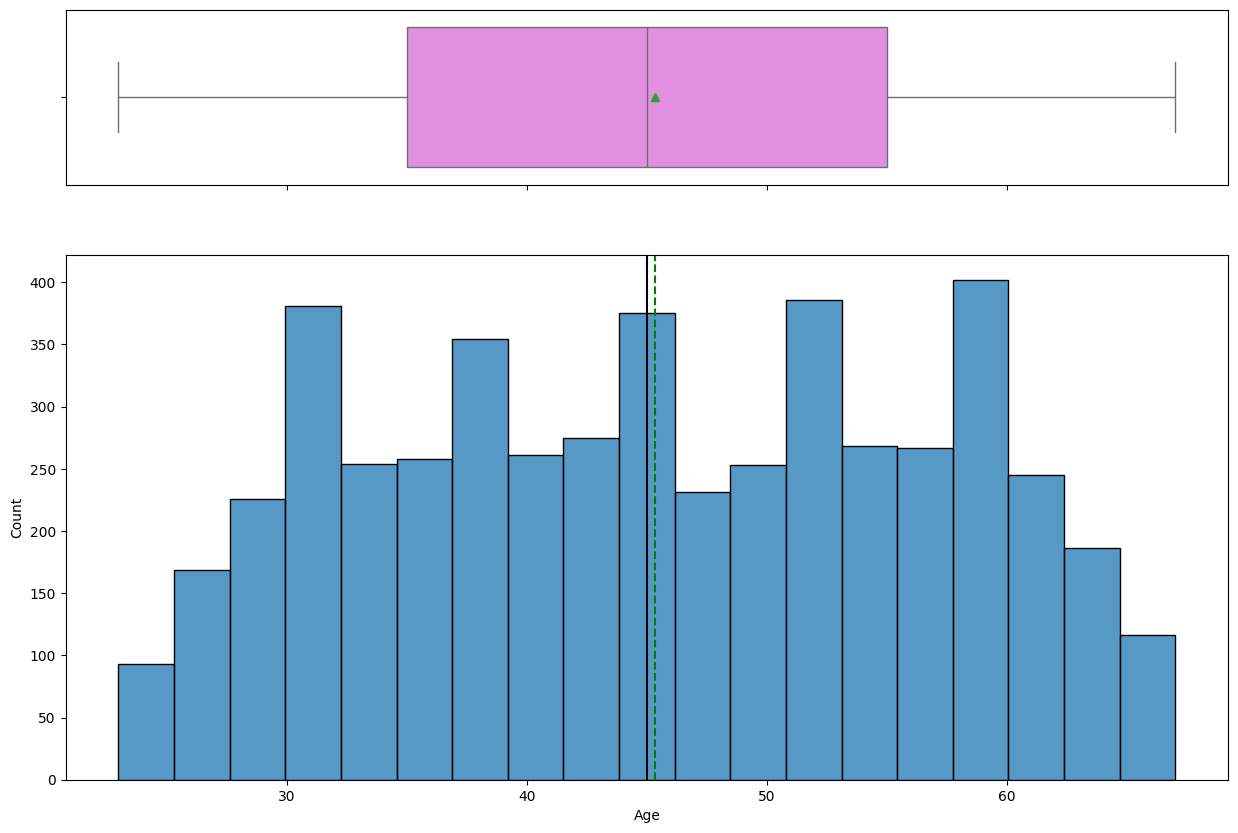

In [304]:
# Analysing the Age using Boxplot
histogram_boxplot(data, "Age")


* Age field does not have any outlier and also appears to be of Uniform distribution, with Mean age around 45.

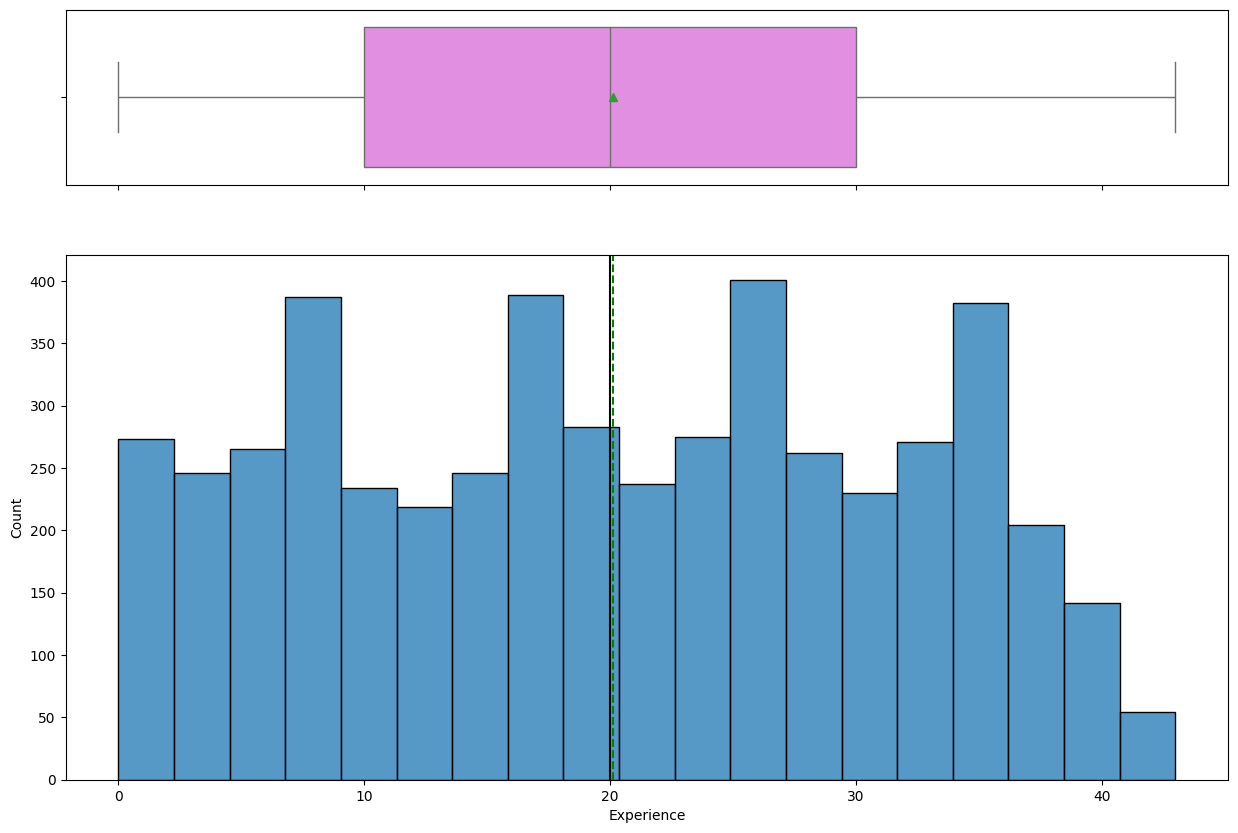

In [305]:
# Analysing Experience using Boxplot
histogram_boxplot(data,"Experience")

* The Experience field appears to be slightly right skewed with mean experience around 20 years

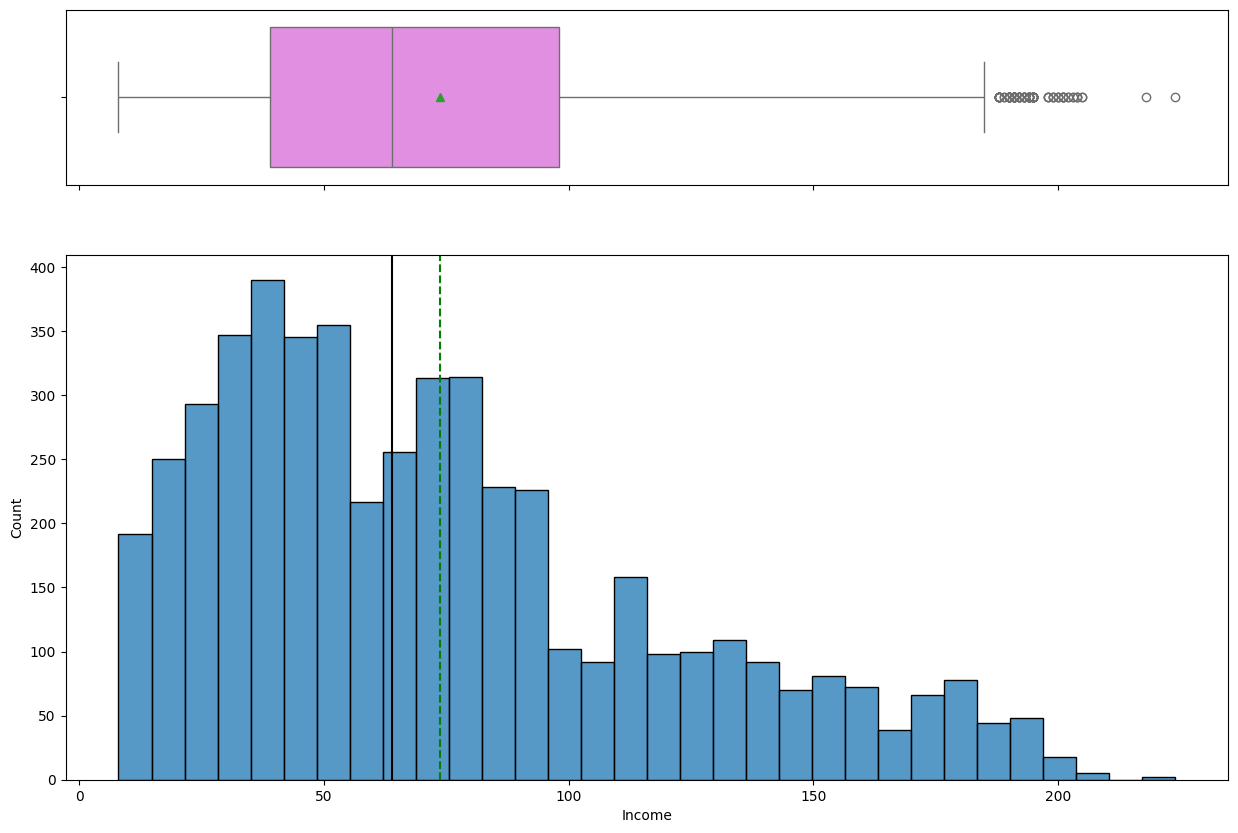

In [373]:
# Analysing Income using Boxplot
histogram_boxplot(data,"Income")

* The Income field appears to be right skewed with mean income around ~74000 dollars and has a couple of outliers on the positive / higher value range !

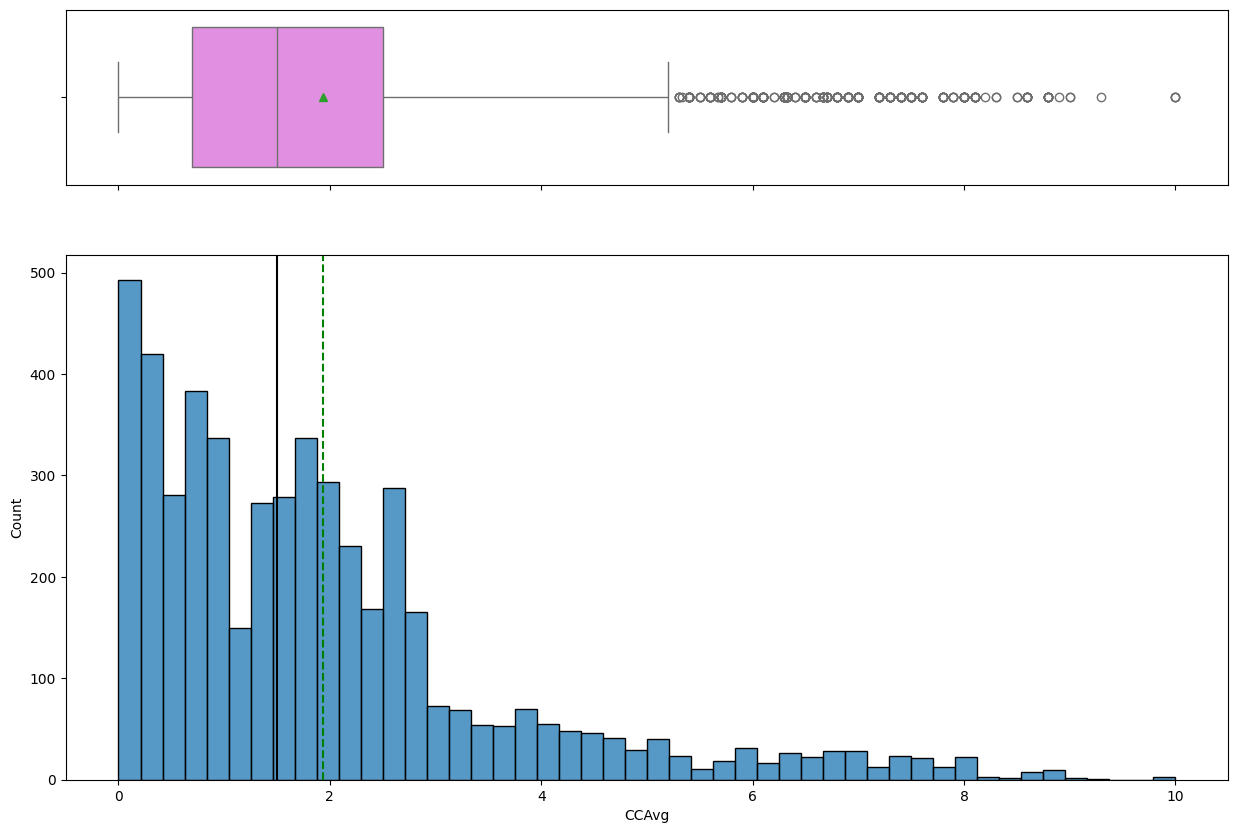

In [374]:
# Analysing CCAvg using Boxplot
histogram_boxplot(data,"CCAvg")

* The CCAvg field appears to be right skewed with mean income around ~1950 dollars and has a couple of outliers on the positive / higher value range !

* QN# 1
What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

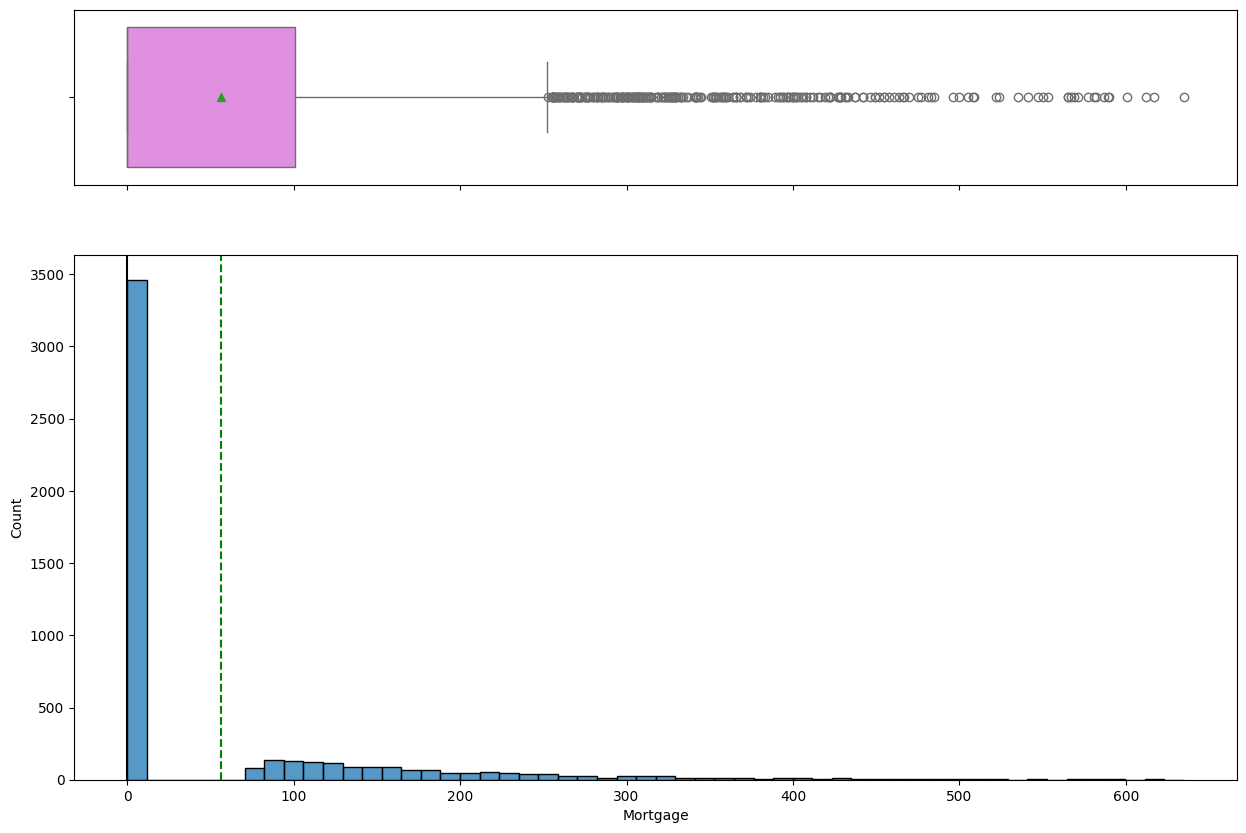

In [306]:
# Answering the Univariate Analysis question on Mortgage as below:
histogram_boxplot(data,"Mortgage")

* Ans to Qn# 1: The house `Mortgage` field is right skewed with many outliers on the upper quartile and the central tendency is towards 56000 dollars, because most of the Customers do not have a house mortgage

* Qn# 2) How many Customers have credit cards ?

In [307]:
# Customers with Credit Cards are represented with value of 1
data["CreditCard"].value_counts()

,count
CreditCard,
0,3530
1,1470


* Ans to Qn# 2 is that 1470 Customers have Credit Cards, while the remaining 3530 Customers do not !

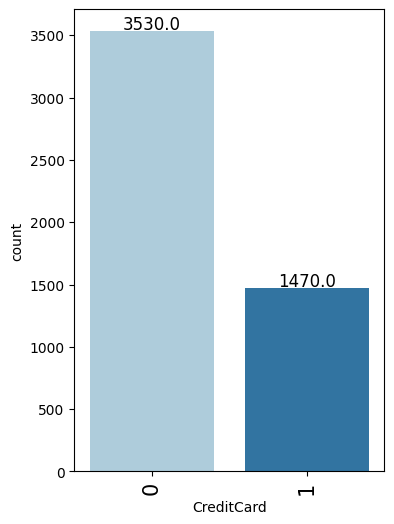

In [376]:
# Analysing CreditCard using Labeled Bar plot
labeled_barplot(data,"CreditCard")

* Ans to Qn# 2 is that 1470 Customers have Credit Cards, while the remaining 3530 Customers do not, this is very evident from the above labeled plot instead !

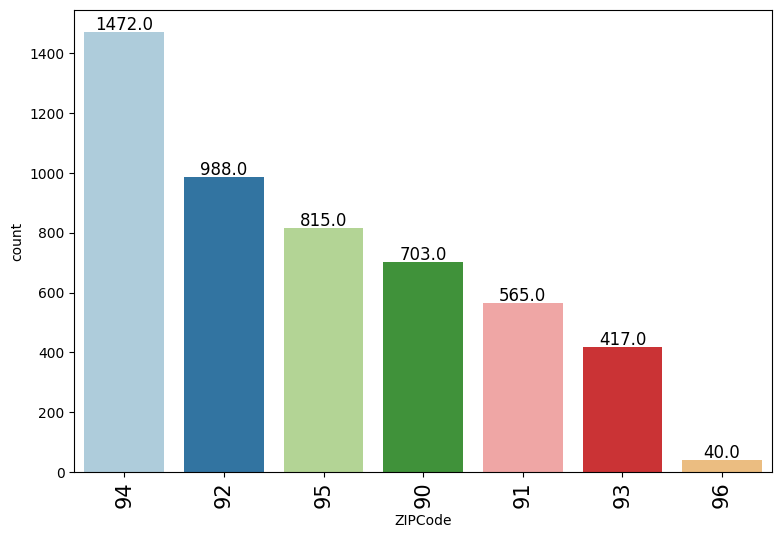

In [377]:
# Analysing trimmed Zipcode using Labeled Bar plot
labeled_barplot(data,"ZIPCode")

* Feature Engineering performed on the Zip Code to just limit them to the first two characters of the 5 digit Zip code has yielded an easily comprehendable representation of the count of Customers, who are geographically grouped together and their spread is labelled above, i.e., The region 94 has the max number of Customers, might be a major MEtropolitan city or regio and rightly it is New York, the bustling City with a lot of Economic activities !

* We may use Labeled Barplots to categorically represent all the below fields, which are potential candidates for Categorical Variables ! **bold text**

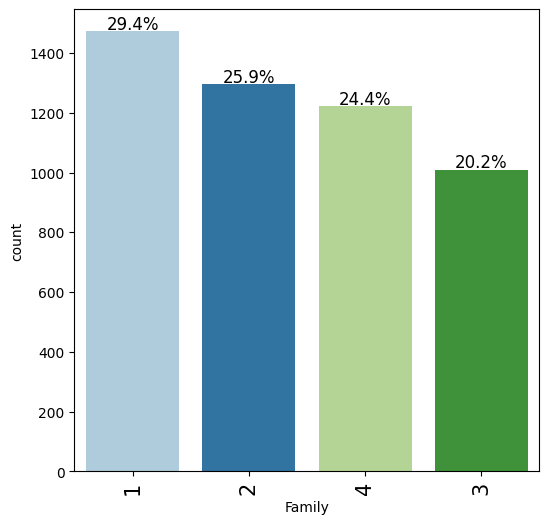

In [378]:
# Analysing Family Members of the Customer using Labeled Bar plot designated by percentage spread
labeled_barplot(data, "Family", perc=True)

* The number of members in the family of the Customers are arranged in the descending order of spread and can be a key field in determing the Target variable (if Personal Loan uptake will be higher) !

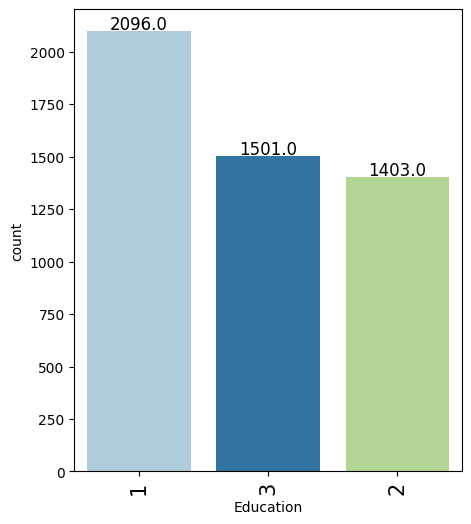

In [379]:
# Analysing Education field using Labeled Bar plot
labeled_barplot(data,"Education")

* It's interesting to note that the number of Customers with the Advanced / Professional degrees over-shoot the number of Customers with Graduate degree holders.

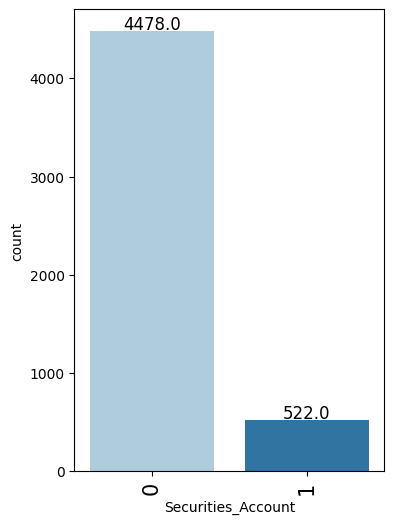

In [380]:
# Analysing Securities_Account field using the Labeled Bar plot function
labeled_barplot(data,"Securities_Account")

* Only (1/10)th of the Customers have a Securities Account with the Bank, and we are not sure about the remaining 4478 Customers if they have Security Accounts / Broekrage Account for trading / stocks / cash account for Investors with other Banks / Financial Institutions !

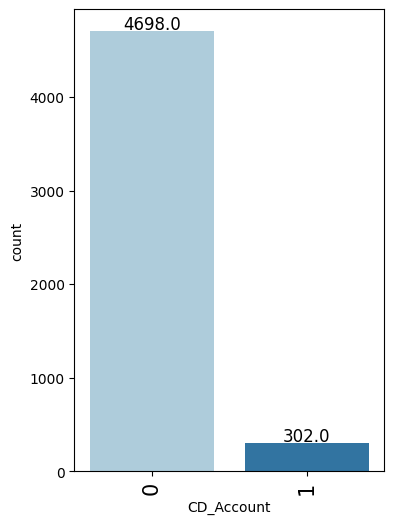

In [381]:
# Analysing CD_Account field using the Labeled Bar plot function
labeled_barplot(data,"CD_Account")

* The number of Customers with Deposit Account in AllLife Bank is only 302

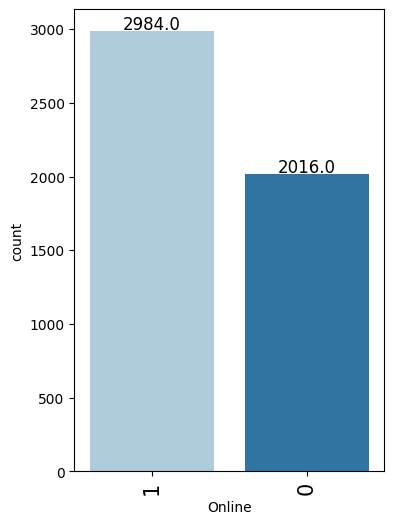

In [382]:
# Analysing Online field using the Labeled Bar plot function
labeled_barplot(data,"Online")

* There is a not a heavily unbalanced data distribution in-between the number of Customers having Online / Internet Banking option (2984) vs (2016), who don't!

### Bivariate Analysis

* Following functions are to be defined for bivariate analysis

In [308]:
# Stacked Barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [309]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Qn# 3): What are the attributes that have a strong correlation with the target attribute (personal loan)?

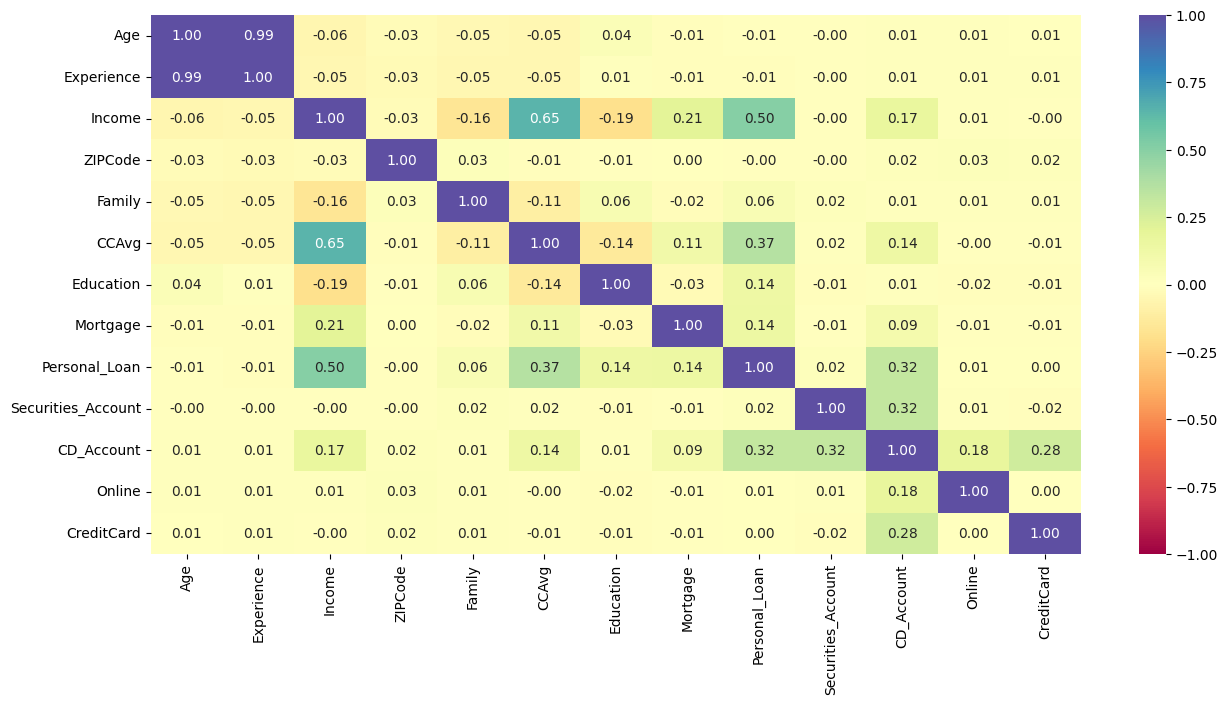

In [384]:
# Correlation among the above  numerical variables can be visualized using a heat map
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


* Ans to Qn# 3 is With the Target Variable as Personal Loan, the fields Income, CCAvg (spending on credit cards per month) and CD_Amount (Customers with Depost) have relative positive co-rrelation as opposed to other fields

Qn# 4): How does a customer's interest in purchasing a loan vary with their Education?

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x700 with 0 Axes>

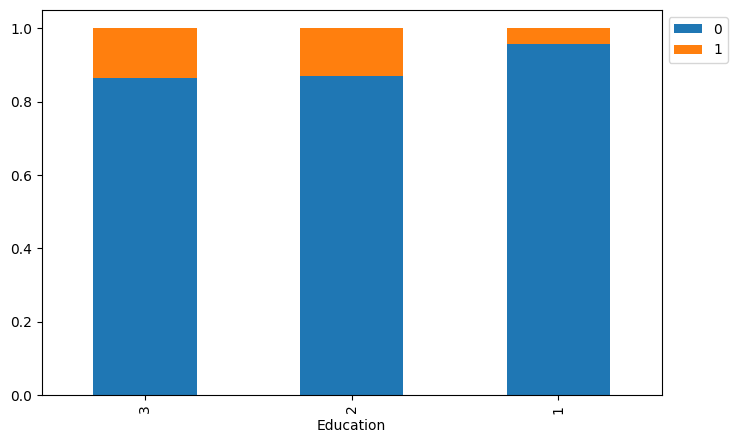

In [311]:
# Analysing the Target Variable vs Education
plt.figure(figsize=(15,7))
stacked_barplot(data, "Education", "Personal_Loan")

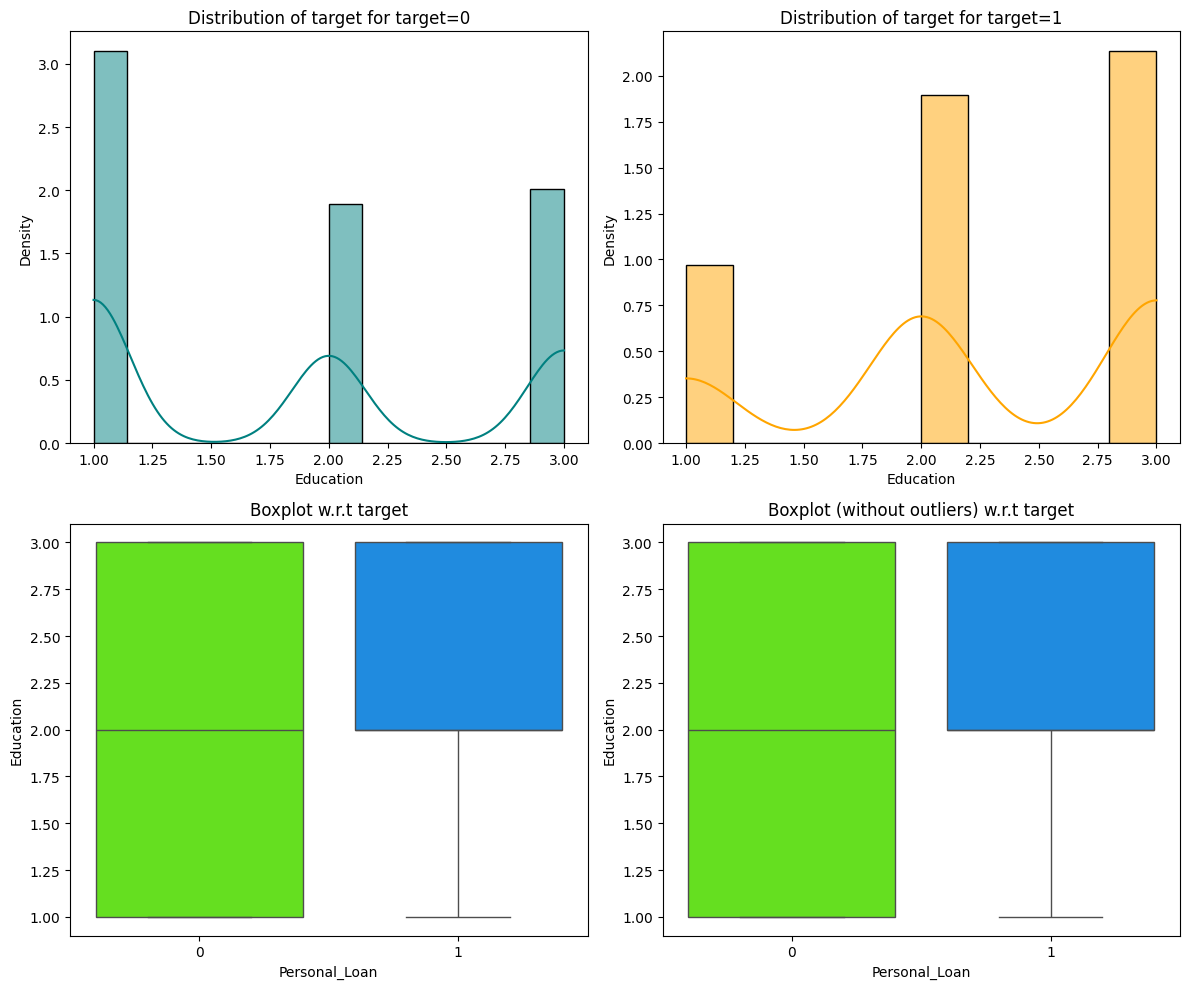

In [312]:
distribution_plot_wrt_target(data, "Education", "Personal_Loan")

* Ans to Qn# 4) is that Customers with the Advanced / Professional Qualification and Graduates have strong inclination for purchasing a loan, as opposed to the Customers who are Undergraduates !
* As seen from the above graphs there are no outliers.

<Figure size 1500x700 with 0 Axes>

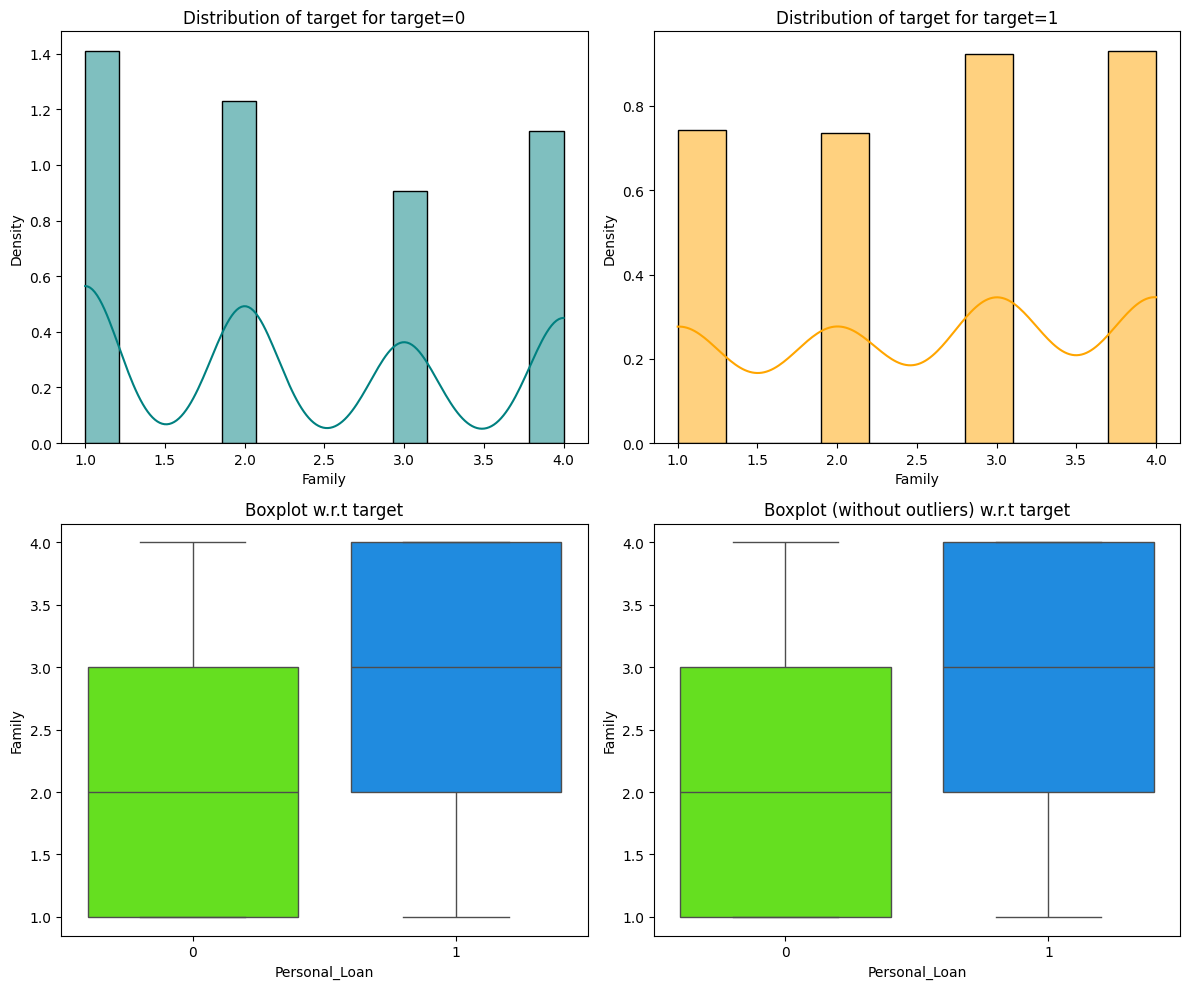

In [386]:
# Let us analyze the relation between Target field Personal_Loan vs Family
plt.figure(figsize=(15,7))
distribution_plot_wrt_target(data, "Family", "Personal_Loan")

* Cusomters with more than 2 family members are inclined to procure Personal Loans as indicated by the central tendency of the chart titled: 'Boxpot w.r.t Target'

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x700 with 0 Axes>

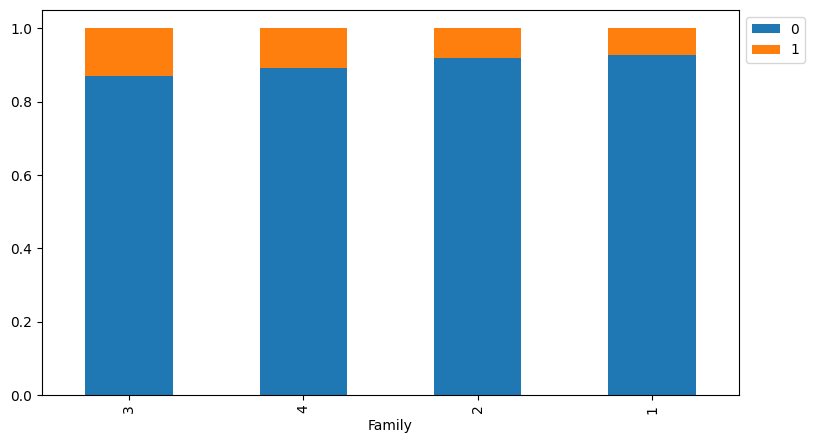

In [398]:
# Stacked Barplot
plt.figure(figsize=(15,7))
stacked_barplot(data, "Family", "Personal_Loan")

* Customers with larger Family Members have taken Personal Loans, as opposed in numbers with Customers, who are single or just a couple (whose family is of just 2) !

<Figure size 1500x700 with 0 Axes>

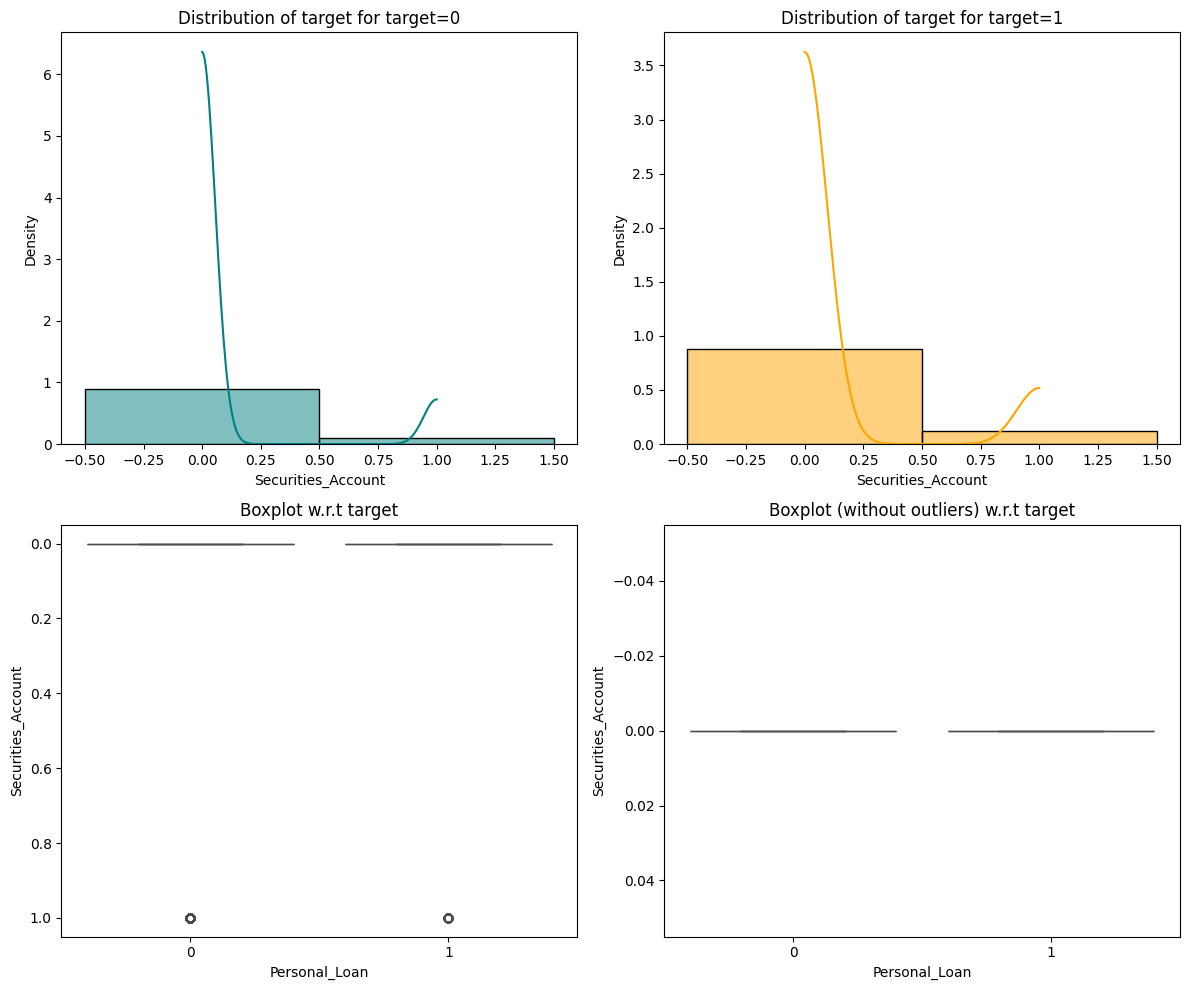

In [395]:
# Let us analyze the relation between Target field Personal_Loan vs Securities_Account
plt.figure(figsize=(15,7))
distribution_plot_wrt_target(data, "Securities_Account","Personal_Loan")

* There seems no correlation between Customers holding Securities Account to the Target variable of Personal Loans !

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x700 with 0 Axes>

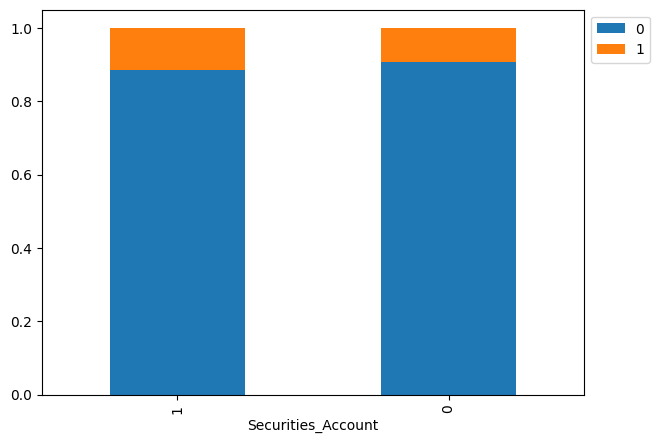

In [400]:
# Stacked Barplot
plt.figure(figsize=(15,7))
stacked_barplot(data, "Securities_Account", "Personal_Loan")

* About ~11% of Customers with Securities_Account in the AllLife Bank have taken Personal Loan offerings, while ~8to9% of Customers with no Securities_Account in AllLife Bank have not taken Personal Loans

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x700 with 0 Axes>

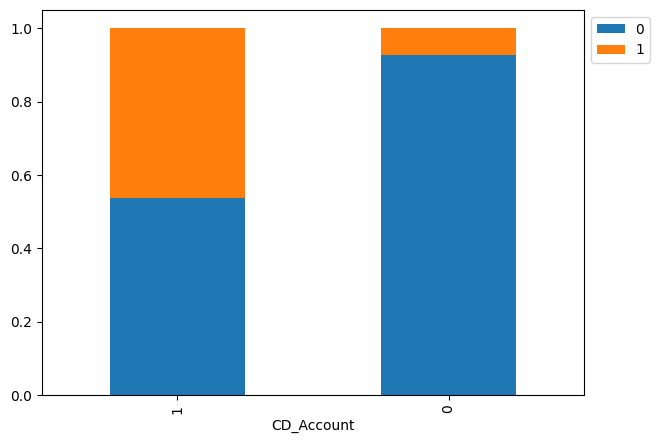

In [401]:
# Stacked Barplot comparison for us to analyze Personal Loan vs CD_Account
plt.figure(figsize=(15,7))
stacked_barplot(data, "CD_Account", "Personal_Loan")

* Approximately 45% of the Customers with the Customer Deposit Account have taken Personal Loans, showing a strong correlation between the two fields !

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x700 with 0 Axes>

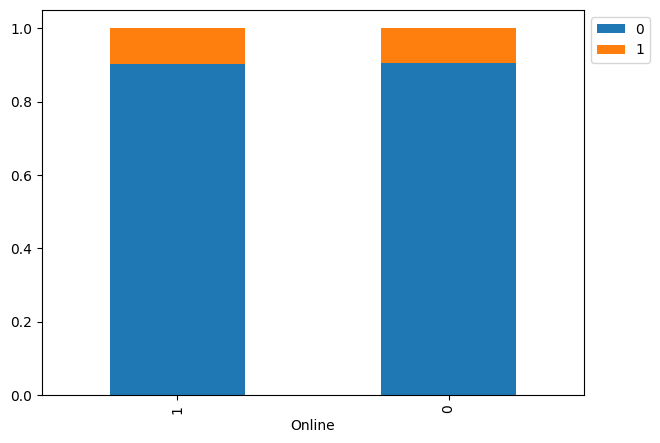

In [402]:
# Stacked Barplot comparison for us to analyze Personal Loan vs Online
plt.figure(figsize=(15,7))
stacked_barplot(data, "Online", "Personal_Loan")

* There is not a strong correlation between Customers holding Online Accounts and Customers with Personal Loans, while there is ~ 10% of the Customers on an average (either with or without online accounts), also hold a Personal Loan from the AllLife Bank !

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x700 with 0 Axes>

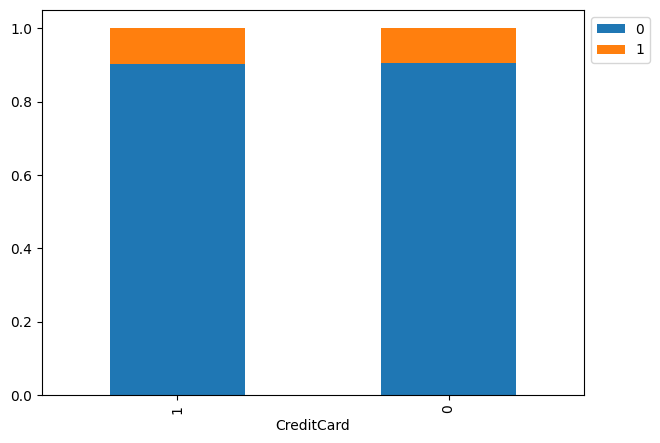

In [403]:
# Stacked Barplot comparison for us to analyze Personal Loan vs CreditCard Holders
plt.figure(figsize=(15,7))
stacked_barplot(data, "CreditCard", "Personal_Loan")

* There is not a strong correlation between Customers holding Credit Accounts and Customers with Personal Loans, while there is ~ 10% of the Customers on an average (either with or without Credit Cards), also hold a Personal Loan from the AllLife Bank, very similar to the previous Bivariate Analysis !

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x700 with 0 Axes>

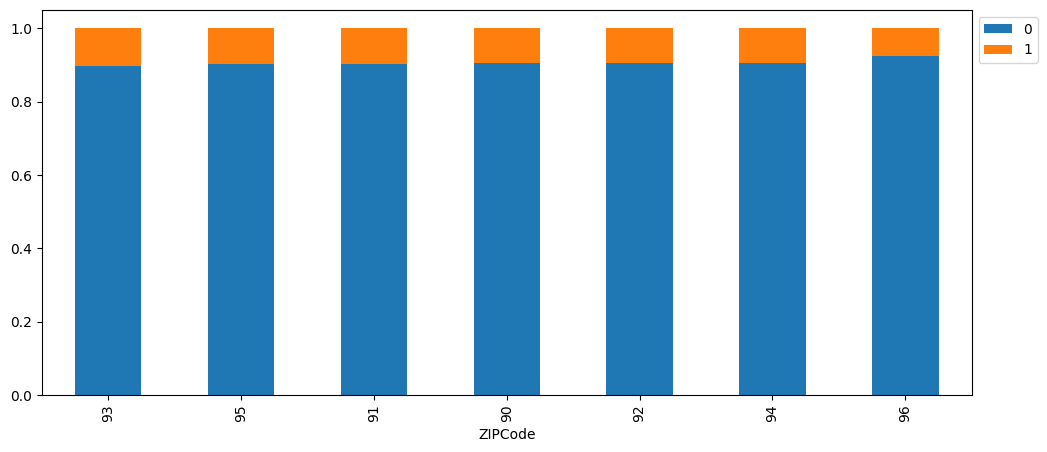

In [415]:
# Stacked Barplot comparison for us to analyze Personal Loan vs Trimmed ZipCode
plt.figure(figsize=(15,7))
stacked_barplot(data, "ZIPCode", "Personal_Loan")

* Almost all the 7 regions, have <=10% of acquiring Personal Laons across the entire dataset of ALLLife Bank, we could say no string correlation between these two fields !

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
20              131   17   148
3               116   17   133
12               86   16   102
25              128   14   142
19              121   14   135
32              140   14   154
26              120   14   134
5               132   14   146
11              103   13   116
23              131   13   144
30              113   13   126
35              130   13   143
16              114   13   127
37              103   13   116
22              111   13   124
29              112   12   124
6               107   12   119
7               109   12   121
36              102   12   114
31               92   12   104
18              125   12   137
13              106   11   117
21              102   11   113
17              114   11   125
28              127   11   138
39               75   10    85
27              115   10   125
34      

<Figure size 1500x700 with 0 Axes>

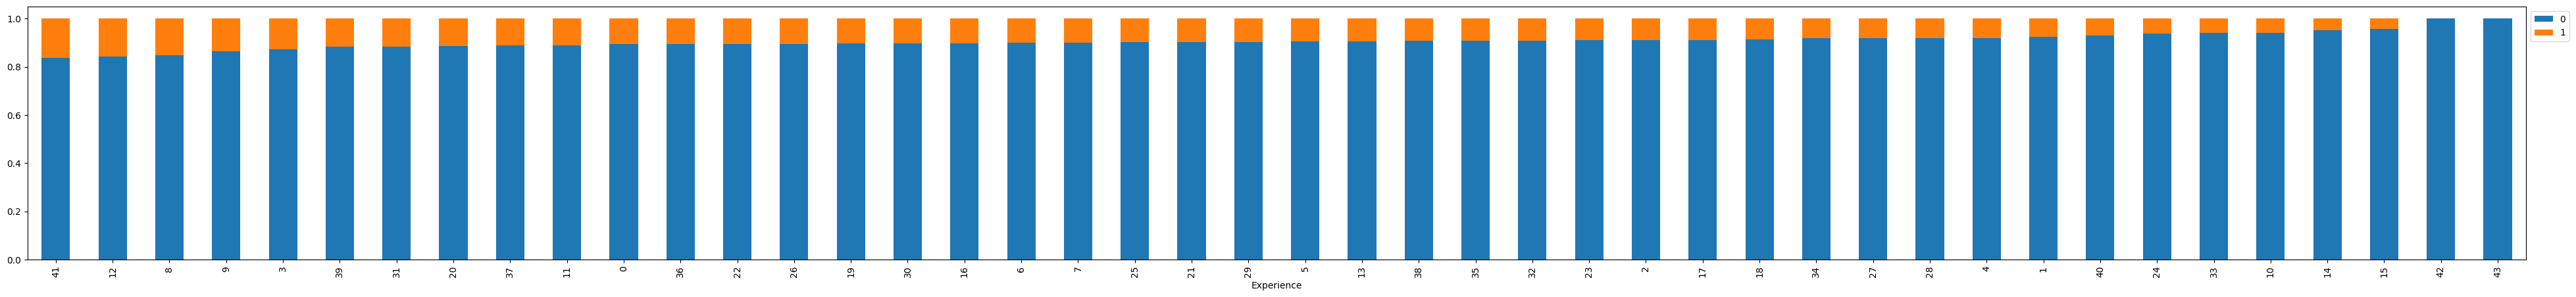

In [416]:
# Stacked Barplot comparison for us to analyze Personal Loan vs Experience
plt.figure(figsize=(15,7))
stacked_barplot(data, "Experience", "Personal_Loan")

* There is absolutely no correlation of Experience with Personal Loan takers, while is a random distribution !

Qn# 5): How does a customer's interest in purchasing a loan vary with their age?

<Figure size 1500x700 with 0 Axes>

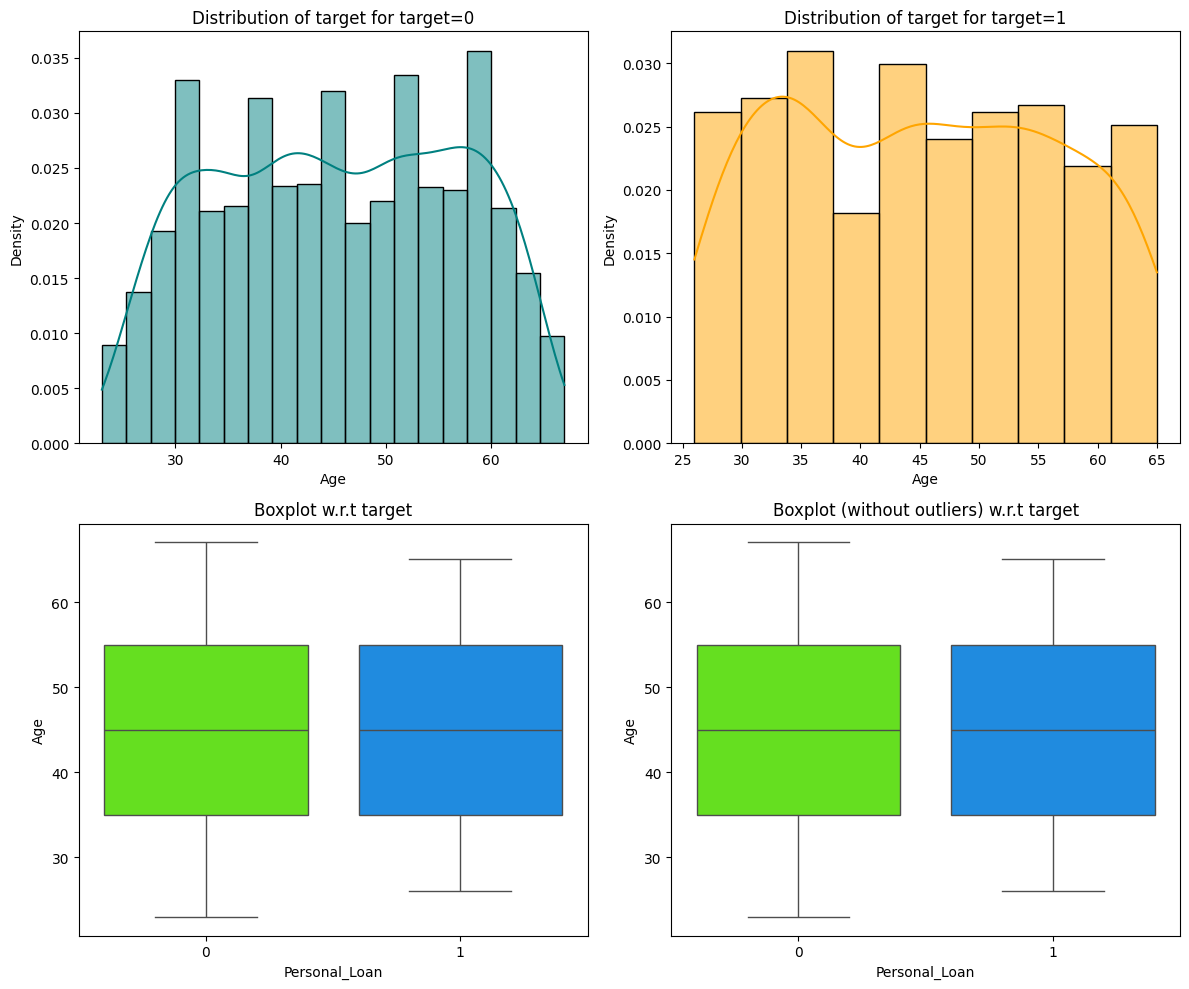

In [420]:
# Bivariate analysis using the defined function on the required target variable vs Age
plt.figure(figsize=(15,7))
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
52              130   15   145
43              134   15   149
33              105   15   120
54              128   15   143
29              108   15   123
42              112   14   126
56              121   14   135
44              107   14   121
65               66   14    80
46              114   13   127
45              114   13   127
50              125   13   138
26               65   13    78
48              106   12   118
27               79   12    91
32              108   12   120
61              110   12   122
57              120   12   132
38              103   12   115
53              101   11   112
51              119   10   129
58              133   10   143
47              103   10   113
60              117   10   127
49      

<Figure size 1500x700 with 0 Axes>

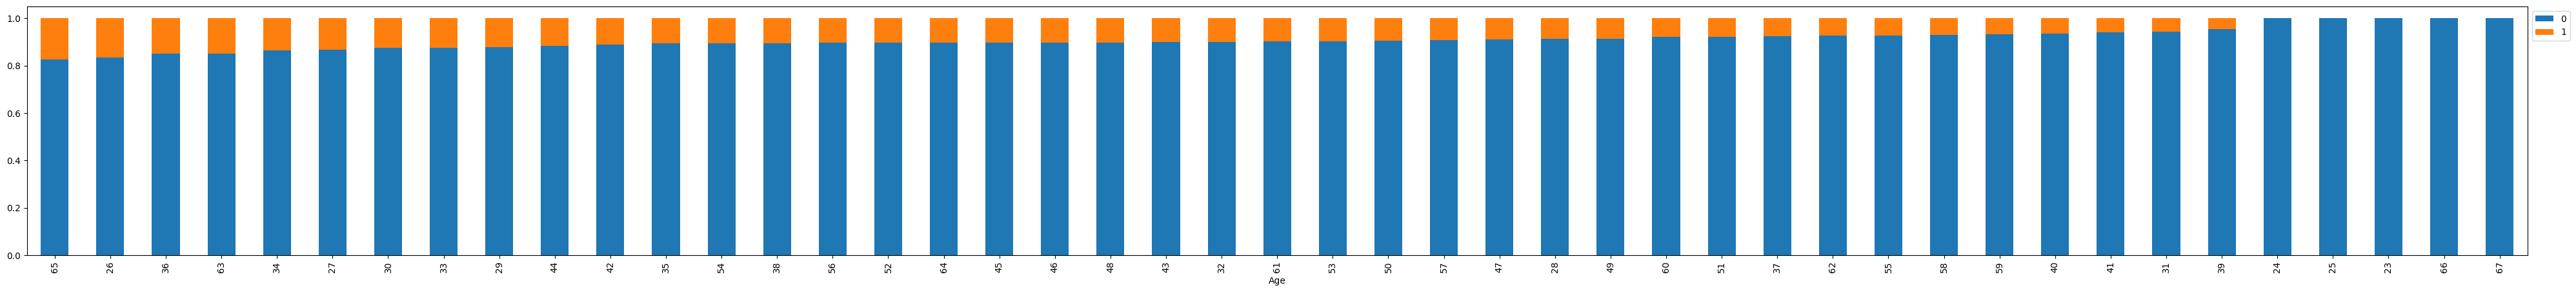

In [417]:
# Stacked Barplot comparison for us to analyze Personal Loan vs Age
plt.figure(figsize=(15,7))
stacked_barplot(data, "Age", "Personal_Loan")

* Ans to Qn# 5) There is an Uniform distribution of the graph between the strong inclination on personal loan w.r.t Age, with the avergae value being around 45 years (expecially among Customers aged 35 to 45 show a strong inclination for the personal loan), but as the Customer's age increases there is not much of takers of Personal Loans.

* The distribution is very similar to the previous Bivariate Analysis and hence has no ** **bold text**strong relationship between Customer Personal Loans to their Age** **bold text**, however the nature of the graph indicates a positive and strong correlation between Age and Experience !


<Figure size 1500x700 with 0 Axes>

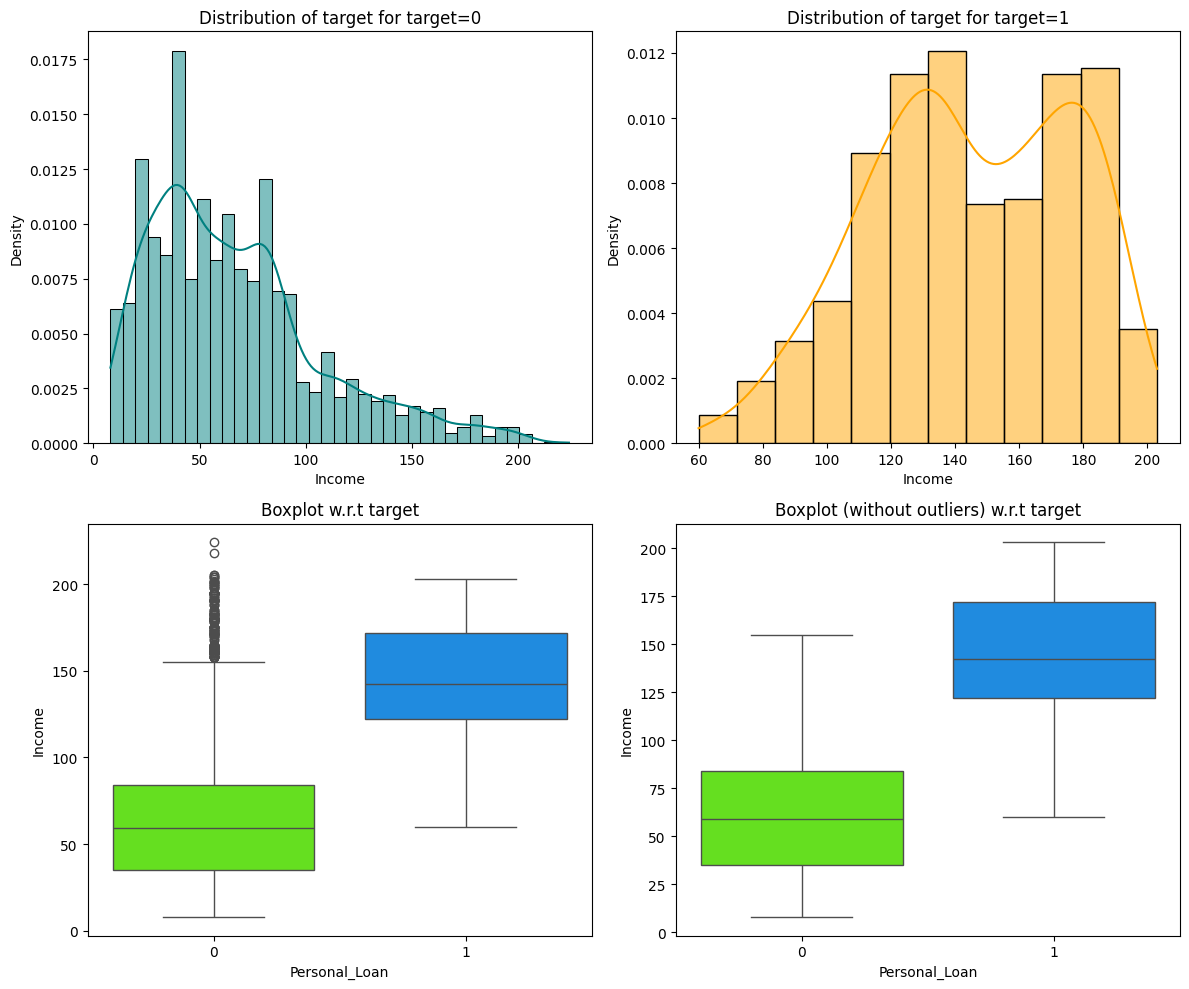

In [418]:
# Let us analyze the relation between Target field Personal_Loan vs Income
plt.figure(figsize=(15,7))
distribution_plot_wrt_target(data, "Income","Personal_Loan")

* There is a clear boundary showing separation of Personal Loan taken by Customers w.r.t Income, higher the Income there is a strong affinity for Personal Laons adoption. Hence, the Income is directly proportional to the likelihood of accepting the Personal Loan Offerings from AllLife Bank ! In addition, there is 0.50 positive correlation between the Consumer's Personal Loan adoption to their Income, as inferred from the Correlation matrix !

<Figure size 1500x700 with 0 Axes>

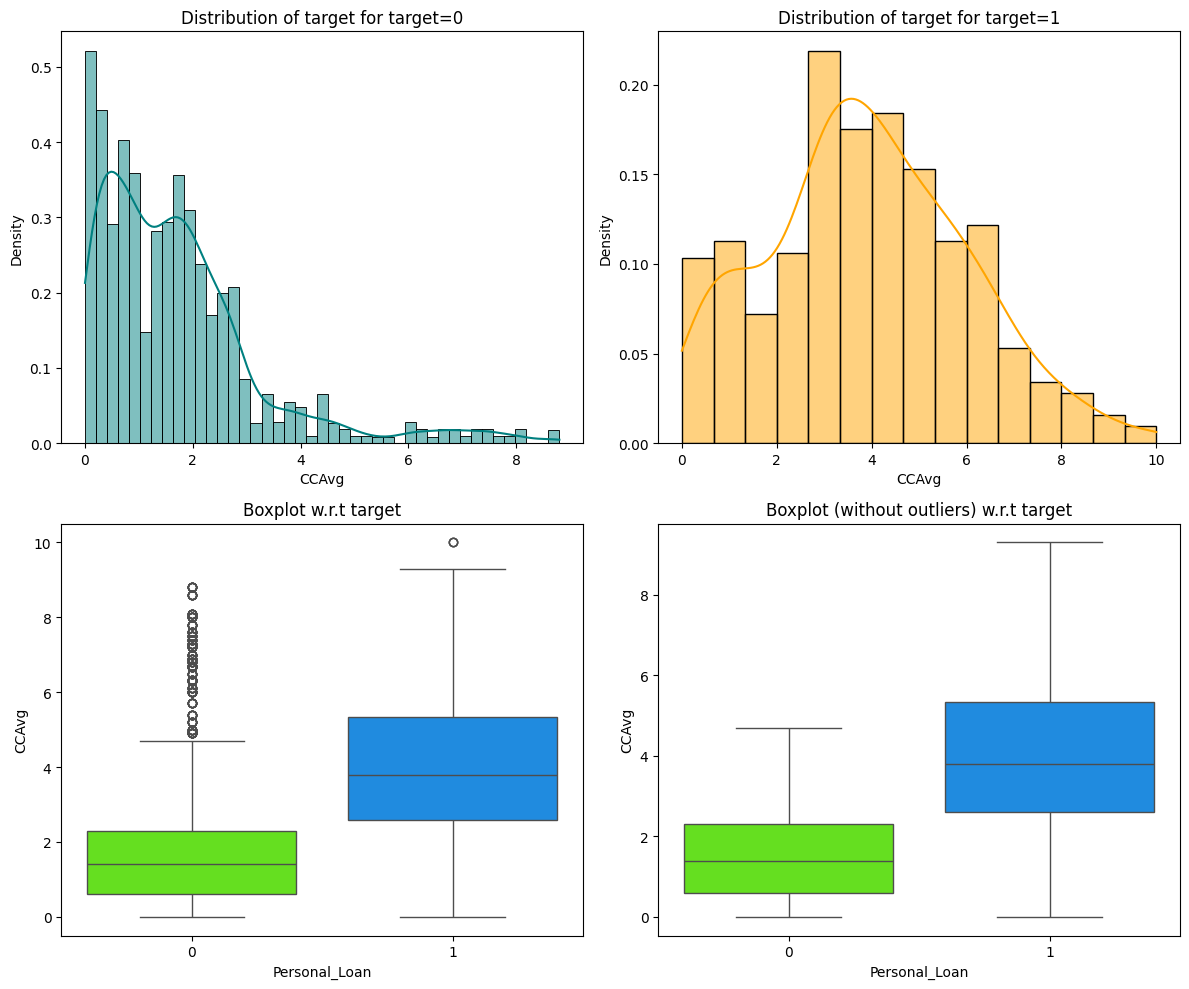

In [419]:
# Let us analyze the relation between Target field Personal_Loan vs CCAvg
plt.figure(figsize=(15,7))
distribution_plot_wrt_target(data, "CCAvg","Personal_Loan")

* There is a clear boundary showing separation of Personal Loan taken by Customers w.r.t CCAvg, higher the Credit Card Avergae Spend per month there is a strong affinity for Personal Laons adoption. Hence, the CCAvg is directly proportional to the likelihood of accepting the Personal Loan Offerings from AllLife Bank ! In addition, they are around 0.37 positively correlated with each other, as inferred from the Correlation matrix !


## Data Preprocessing (contd.)

* Outlier detection and treatment (if needed)

In [393]:
# to find the 25th percentile and 75th percentile for the numerical columns, used in determining the IQR - Inter-Quartile range used in Outlier detection !
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [392]:
# Percentage of outliers in each column
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


In [314]:
# User-defined functions
def show_boxplot_outliers(data, num_cols, figsize = (10, 10)):
  '''
  Description: Function to plot multiple boxplot to display the outliers
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    num_cols: list, required
      The column names of numeric columns
    figsize: tuple, optional
      The figure size in inches, default: (10, 10)
  '''
  plt.figure(figsize = figsize)

  for i, variable in enumerate(num_cols):
      plt.subplot(4, 4, i + 1)
      plt.boxplot(data[variable], whis = 1.5)
      plt.tight_layout()
      plt.title(variable)

  plt.show()

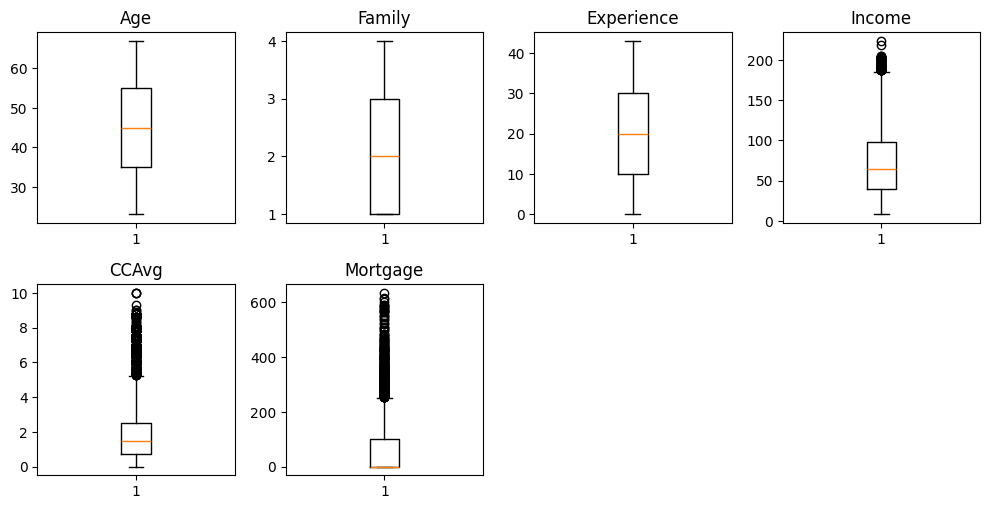

In [315]:
# Numerical Columns while assuming the remaining to be Categorical as done below
numerical_cols = ['Age','Family', 'Experience', 'Income', 'CCAvg', 'Mortgage']
# Display if there are outliers in the numerical columns
show_boxplot_outliers(data = data, num_cols = numerical_cols)

* Income, CCAvg and Mortgage has many number of outliers in the upper range values, while these outliers do not require to be treated as they are all considered valid values in the Business context with high values of all these fields can exist in the real-life scenarios as well (w.r.t dataset provided) from AllLife Bank !

In [316]:
# Create a list of the Categorical columns for further analysis
categorical_cols = ['ZIPCode','Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
data[categorical_cols] = data[categorical_cols].astype("category")

### Data Preparation for Modeling

In [317]:
# dropping Experience as it is perfectly correlated with Age, as inferred from the Correlation matrix
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

# Get_dummies converts categorical data into a numerical format suitable for machine learning models by creating dummy or indicator variables,
# where each category becomes a binary (0 or 1) column.
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

* Code to visualize the Train and Test data from the dataframe

In [318]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* We had seen that around ~90% of observations belongs to class 0 (not interested in Personal Loan) and ~10% observations belongs to class 1 (interested in taking Personal Loans), and this spread of data is preserved in the train and test sets, without even using the stratify during the split.
* This is a clear indication of a data imbalance problem on the Target variable (Personal Loan acceptance).

### Model Evaluation Criterion

**Model can make wrong predictions as:**

Model predicting a customer will accept a loan, but in reality the customer would not accept a loan (False Negative).
Predicting a customer will not accept a loan, but in reality the customer would have accepted a loan (False Positive).

**Which is the scenario of more importance?**

The main goal of the Company is to identify the customers, who will accept a loan.
Scenario# 2: If we predict that a customer will not accept a loan, but the Customer actually does accept a loan, it will be a loss of opportunity for the bank to increase its loan customers and therefore to increase its revenue.
Scenario# 1:If we predict that a customer will accept a loan, but the Customer will not actually accept a loan, the bank will have to bear the cost of resources/ operations in identifying potential new loan customers and the time spent by the Bank's resources with a Customer who does not eventually take a Personal Loan - which is a slight overhead in comparison to the above Scenario#2.

**How to reduce this loss (i.e. To reduce False Negatives)?**

Recall evaluation metric should be gauged to be maximum, the higher the Recall, greater will be the chances of minimizing the False Negatives.


### Model Building

In [319]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [320]:
# Custom-defined function on confusion matrix determination logic
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (default)

In [321]:
# A fully grown decision tree, or a Tree which has no restrictions imposed on it called the default model
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

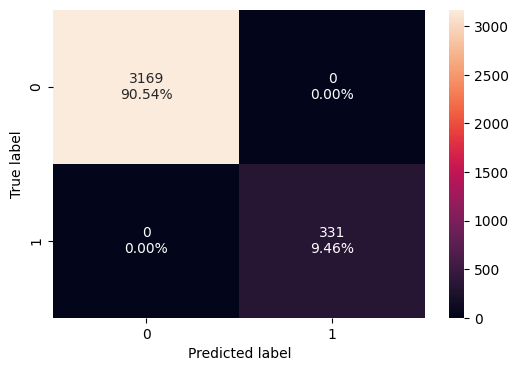

In [322]:
# Creating Confusion Metrics
confusion_matrix_sklearn(model0, X_train, y_train)

In [323]:
# Evaluation metrics of this highly imbalanced data spread is as below
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Just with the values of 1.0 for most of the metrics it is clear cut example of over-fitting model from train data without the need to even check the model on the test data.

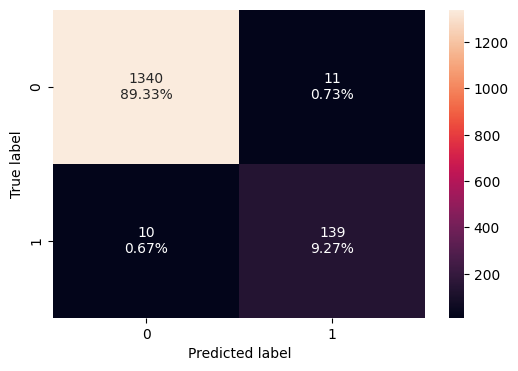

In [324]:
# Still ascertaining the metrics on test data, implies Over-fitting of the model
confusion_matrix_sklearn(model0, X_test, y_test)

In [325]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


* Although the above output on the test data looks like a case of Generalization, the data is still over-fitted with the highly imbalanced nature of the spread of 0 and 1s on the Target variable, hence arises the need for Class Weights

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [326]:
# Creating a Decision Tree Model with the Class_weight = 'balanced'
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

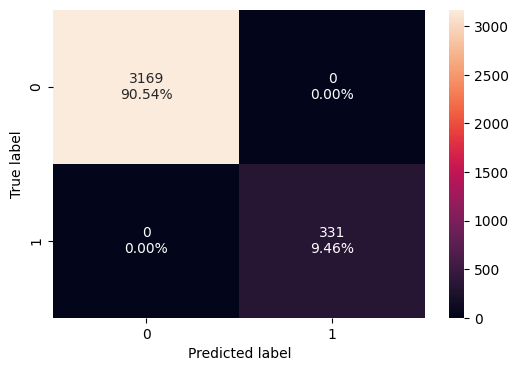

In [327]:
# Confusion matrix on the Model# 1
confusion_matrix_sklearn(model1, X_train, y_train)

In [328]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

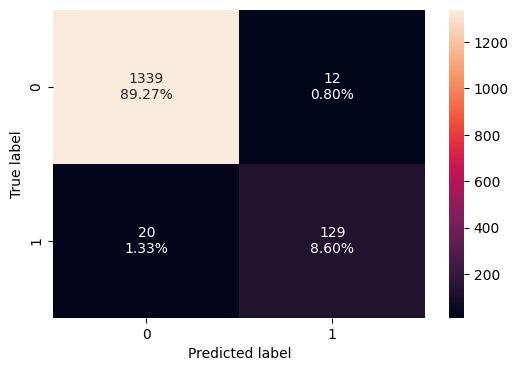

In [329]:
# Confusion matrix for model 1 on the test data
confusion_matrix_sklearn(model1, X_test, y_test)

In [330]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.865772,0.914894,0.889655


* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting - despite employing the class_weight as balanced !

## Model Performance Improvement

Let's use pruning techniques to try and reduce overfitting.

### Decision Tree (Pre-pruning)

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [331]:
# Define the hyper-parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [332]:
# creating an instance of the best model, whiich is just after PRe-Pruning with all the Hyper-parameter consideration is done
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

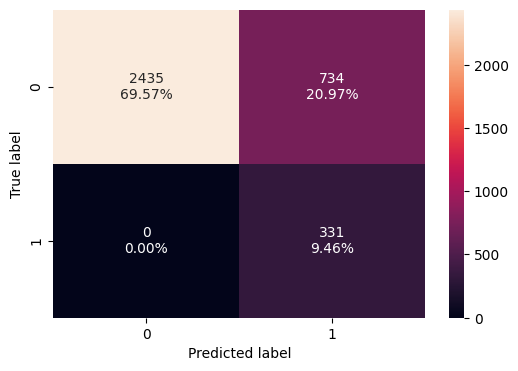

In [333]:
# Confusion matrix values for the model# 2 on the training data
confusion_matrix_sklearn(model2, X_train, y_train)

In [334]:
# Evaluation metrics for the model# 2 on train data
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


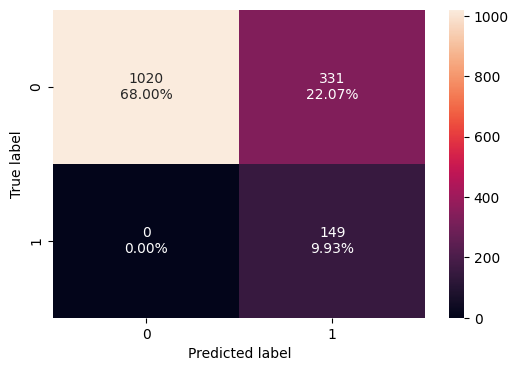

In [335]:
# Confusion matrix values for the model# 2 on the test data
confusion_matrix_sklearn(model2, X_test, y_test)

In [336]:
# Evaluation metrics for the model# 2 on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be 1.0 which shows that the model is able to generalize well on unseen data. Overfitting is  definitely reduced and the best part is all the evaluation metrics are also comparable between the train and the test data.
* Hence, the Model# 3 is more than ideal to solve our Business problem and also to be deployed in the Production environment!

In [337]:
# Code to find out the Feature Importances, this will help us answer an important question of the Objective
# i.e., enlist the dimensions or fields that are of importance in the Customers accepting the Personal Loan
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

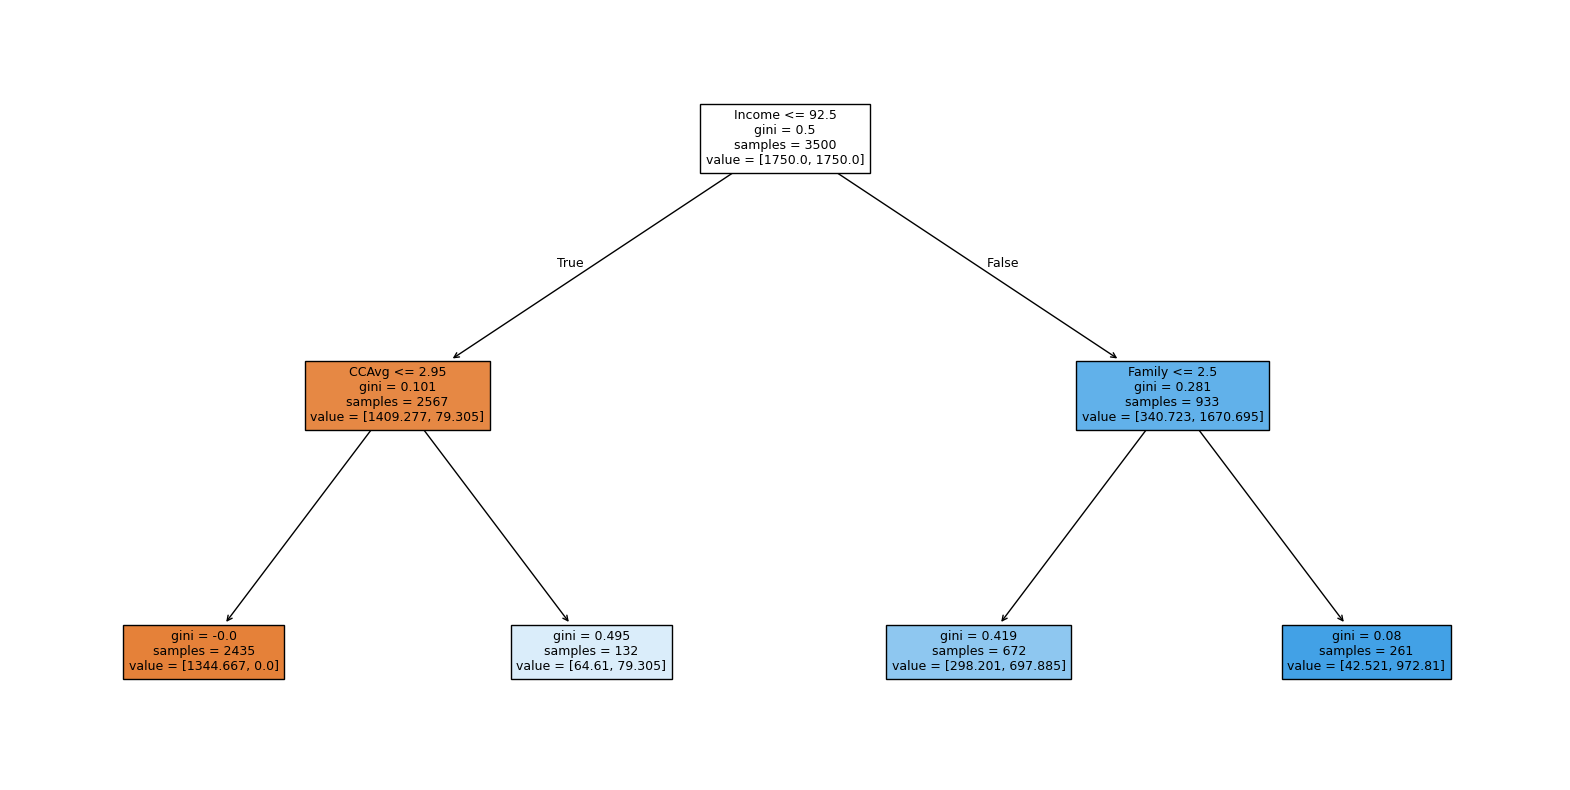

In [338]:
# Creating a Decision Tree for visual representation
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [339]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



Using the above extracted decision rules we can make interpretations from the decision tree model like:

- If the Income is less than or equal to 92500 dollars and with CCAvg (average Credit Card Spending per month) is greater than 2950 dollars (OR) with the income of Customer being greater than 92500 dollars and (irrespective of their Family size of the Customer being less or more than 2.5), the Personal Loan is more likely to be accepted by the Customer.

In [340]:
# Code to find out the Feature Importances, this will help us answer an important question of the Objective
# i.e., enlist the dimensions or fields that are of importance in the Customers accepting the Personal Loan
importances = model2.feature_importances_
importances

array([0.        , 0.87652937, 0.05653065, 0.06693998, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

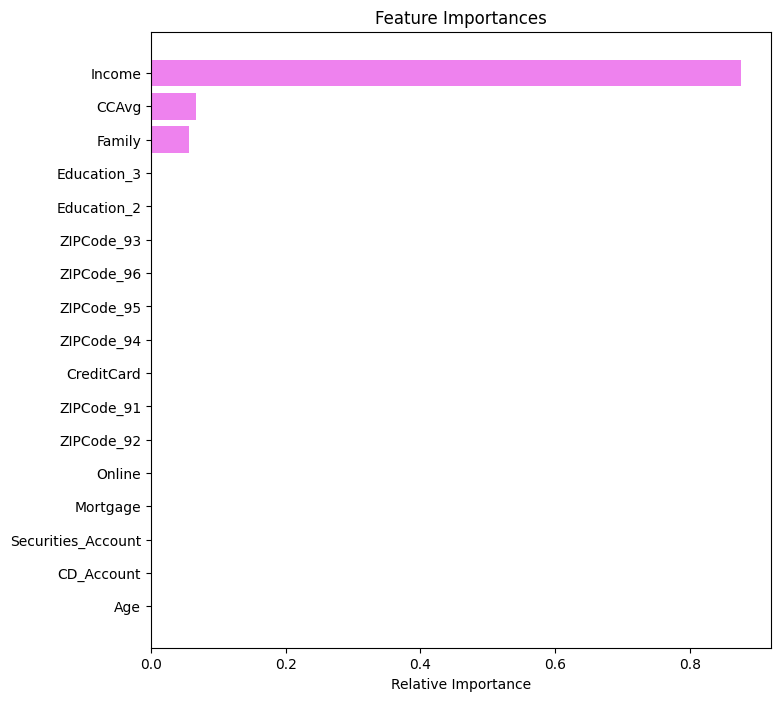

In [341]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* From pre-pruning Income, CCAvg and Family are the most important features and with their values being higher, they can be directly proportional to the Customers accepting a Personal Loan product !
* In the pre-pruned decision tree, Income is almost 90% the most important field, while CCAvg and Family cater to around 8% and 7% respectively - which are the most influential (or) important fields to be focused on, using which the Bank could proceed with the likelihood of making a Customer buying a Personal Loan product (i.e., If a Customer is likely to take a Personal Loan product, then 90% contributing or importance reasoning would be the Customer's Income, while that dependency reduces to 8% and 7% for CCAvg and Family related data of the Customer).

### Decision Tree (Post pruning)

- Cost complexity pruning is one method of Post-pruning, which provides option to control the size of a tree after the decision tree has grown to its full size as in Model0.
- In `DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``.
- Greater values of ``ccp_alpha`` increase the number of nodes pruned.
- Here we only show the effect of ``ccp_alpha`` on regularizing the trees and how to choose the optimal ``ccp_alpha`` value.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [342]:
# Code for the Post-pruning methods of Decision Tree, showing the value of ccp_alphas vs impurities using the cost_complexity_pruning_path function
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [343]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.759588e-16
1,3.853725e-19,-7.755734e-16
2,4.729571e-19,-7.751004e-16
3,5.255079e-19,-7.745749e-16
4,5.255079e-19,-7.740494e-16
5,7.707449e-19,-7.732787e-16
6,1.051016e-18,-7.722277e-16
7,1.576524e-18,-7.706511e-16
8,1.257806e-17,-7.580731e-16
9,1.524700e-04,3.049400e-04


* Here are the 42 points from the fully grown tree, that we could go ahead and cut out the branches, with calculated ccp_alpha values for each of the points or decision nodes, which apparently become a leaf node if pruned !

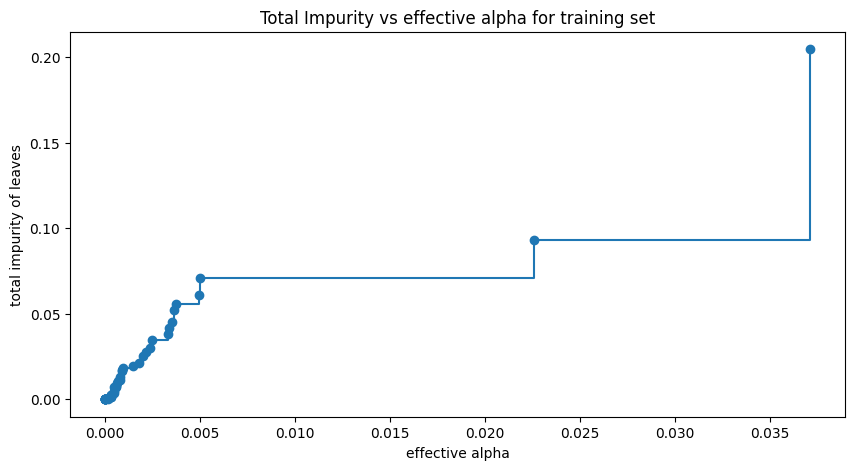

In [344]:
# Graph depicting the increase in CCP_Alpha values in the X-axis with increase in the impurities as well of leaves
# with the pruning process or the cutting of different leave nodes happen, at the leaf node level the impurities become higher !
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [345]:
# For each of the 42 ccp_alpha values, we create a decision tree using the Train data, we establish their individual evaluation metric parameter say Recall in this use-case
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992314


* For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

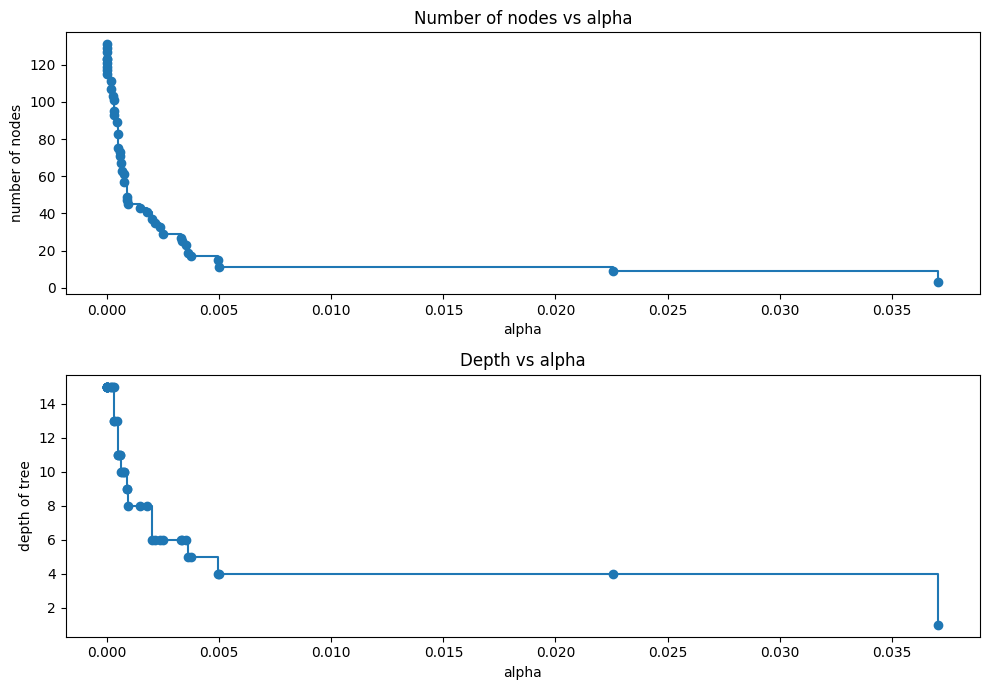

In [346]:
# Plot the Graphs as shown below
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* In the graphs above, when the ccp_alpha values is increasing the number of nodes is very less implying it's impurity increases with Pruning activities of a node. This is contextually true with depth of the tree as well, which is also inversely proportional to impurities / ccp_alpha values.

In [351]:
# Training data evaluation done using the Recall metrics for each of the 42 points
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [352]:
# Test data evaluation done using the Recall metrics for each of the 42 points
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [353]:
# Computing the train and test scores for plotting in the graph
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

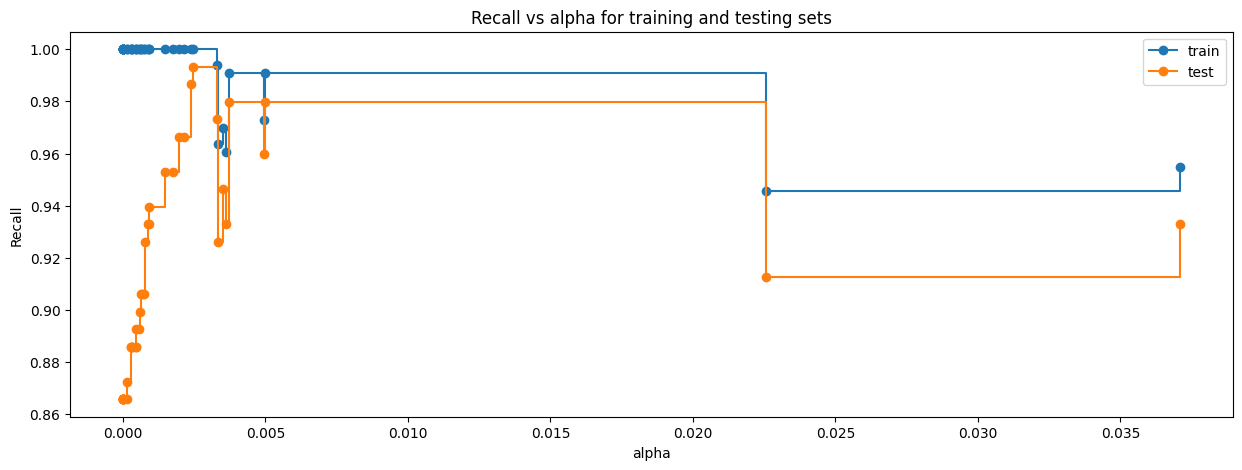

In [359]:
# Plotting the graph to identify the ideal value of ccp_alpha to be used in the Post-pruned tree
# From the below graph it is quite evident that the ccp_alpha is optimum or ideal when the disparity
# between the recall scores of our Train data and the Test data variance or difference amongst them is very less,
# implies a very less over-fitting between my training and test data occurs at the first instance !
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [358]:
# creating the model where we get highest train and test recall, which also depicts the Optimum ccpalpha value required for the construction of our Post-pruned Decision Tree
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0024726598786422157),
                       class_weight='balanced', random_state=1)


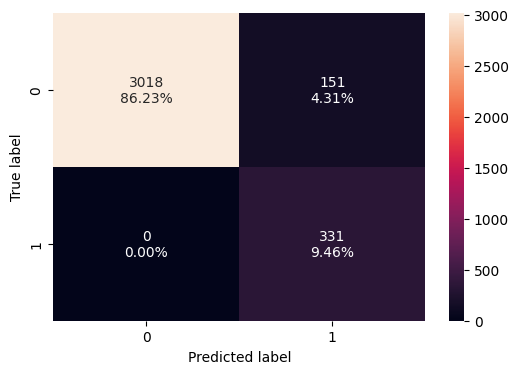

In [360]:
# Post-pruned Decision Tree created as model4 and used for evaluation of the performance of all the models, expecially between the pre-pruned and the post-pruned models
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [361]:
# Even in the Model4 we get an optimum recall score on the train data as 1.0
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


In [363]:
# Even in the Model4 we get an optimum recall score on the train data as close to 1 as is ~0.9932, implying very good generalization on the data
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566


* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 1 and 0.99 respectively, which shows that the model is able to generalize well on unseen data.

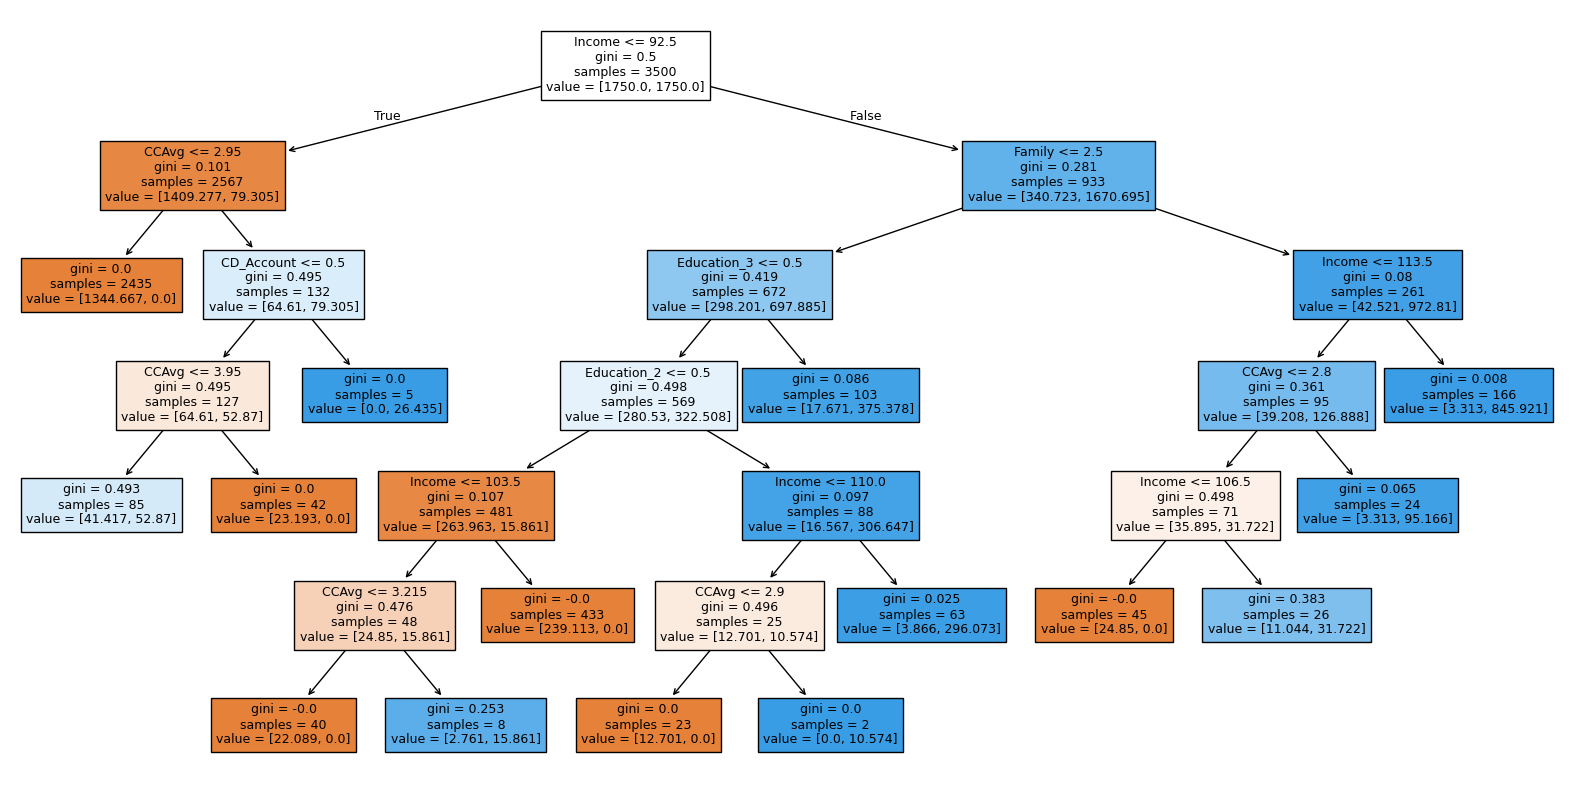

In [365]:
# Using the model4 with the optimum ccp_alpha value = 0.0024, we are plotting a decision tree for visualization
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [368]:
# Understanding the important features contributing to the Target variable, in post-pruned decision tree
importances = model4.feature_importances_
indices = np.argsort(importances)

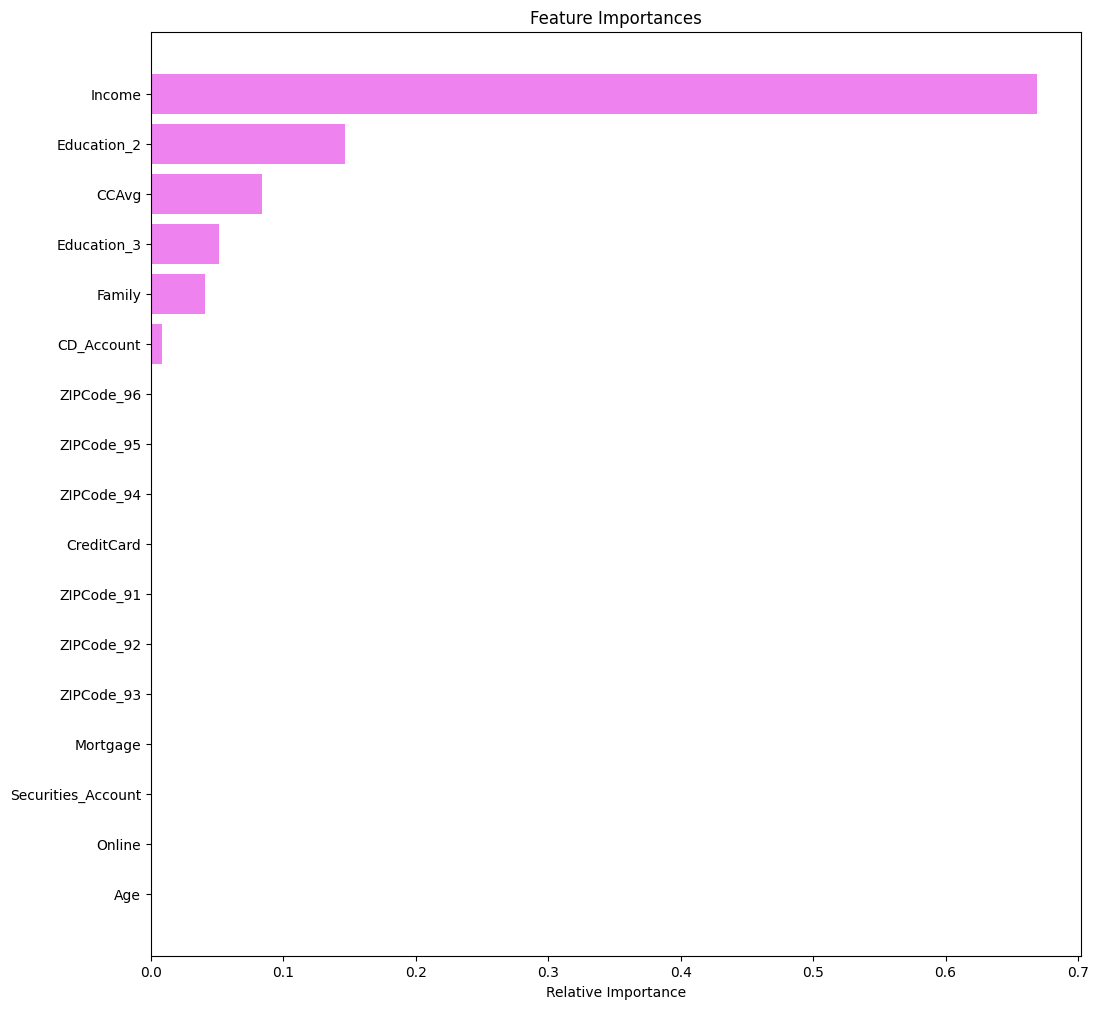

In [369]:
# As the depth of the Tree is higher in post-pruning, as opposed to the pre-pruned tree, the number of important features contributing to the Target variable is relatively higher !
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We have a similar feature importance as we had for the Pre-pruned model, with the exception in Post-pruned tree model4, we have the Education values as 2 and 3 gaining traction along with CD_Account to be important levers - in addition to the important features of (Income, CCAvg and Family) which were also present in the Pre-pruned feature importance, thus all these fields would help in contributing to the increase in the likelihood of a Customrer, taking a Personal loan product from the Bank, if we were to consider the Post-pruned model.

## Model Performance Comparison and Final Model Selection

In [371]:
# training performance comparison on the Training Data

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [372]:
# testing performance comparison on the Test data

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.978667,0.779333,0.948667
Recall,0.932886,0.865772,1.000000,0.993289
Precision,0.926667,0.914894,0.310417,0.660714
F1,0.929766,0.889655,0.473768,0.793566


* Decision tree models with pre-pruning is giving high recall scores toppning the value of 1.0, on both training and test sets.
* Therefore, we are choosing the pre-pruned tree as our best model and over-looking the post-pruned model (which is also the norm in the Industry Best practise) as the latter method is computationally intensive and hence we prefer pre-pruned model (model3) for Productionizing and also to solve the Business problem in hand !

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?


Conclusions: **bold text**

The Decision Tree (Post-pruning) model provides recall score of 1.00 for training set and 1.00 for testing set after using the following Hyperparameters:

random_state = 1
class_weight = 1
ccp_alpha = 0.0024726598786422157
The Decision Tree (Post-pruning) model shows that it can be used to predict if a customer is going to accept a loan and can approximately identify 99.32% from the potential loan customers from the test data.

The Decision Tree (Pre-pruning) model shows that it can predict 100% of the time that the customer will accept a loan if the customer meet the following conditions, hence we prefer Pre-pruned model3 over the post-pruned model4.

Condition# 1): Income is less than or equal to 92500 dollars
and CCAvg value is greater than 2.95


OR:

Condition# 2): with the income of Customer being greater than 92500 dollars, (irrespective of their Family size of the Customer being less or more than 2.5),

Feature importance shows that Income (close to 0.90), CCAvg (close to 0.08) and Family (close to 0.07) are the most important factors in predicting potential loan customers and implies the likelihood of Customers accepting a Personal Loan product, which answers a key objective of the Busines problem w.r.t AllLife Bank.

Hyperparameters and pruning provides great value in tuning your model and to reduce overfitting (especially in model3)

Recommendations, from the Business context is also drawn with the feature importances coming from the post-pruned model4, as they point to more number of important features to addeess the Busines problem:

The following customer features/parameters need to be thoroughly assessed when indentifying potential loan customers:

**Income:** Majority of the customers who accepted a loan have higher income (mean value close to $145K). So any person, with a higher income, will also be leading a lavish lifestyle and might be in need of extra cash - which can be provided by luring these Customers with Personal loan products !

**CCAvg:** Majority of the customers who accepted a loan have higher credit card average spending (mean value close to $4K). These Customers can take Personal Loans, if they happen to default on their monthly repyament cycle w.r.t their existing Credit Cards and their need can be leverage to promote Bank's business !

**Family: **Majority of the customers who accepted a loan have more family members (mean value close to 2.6).A larger Family, has more needs and money is  akey factor in this, hence the likelihood of Customers with larger families can be approached with Credit Card Product offerings !

These top 3 fields are key and commonly found in both the pre-pruned models and also in the post pruned models !

**Education: **Majority of the customers who accepted a loan have higher education level (mean value close to 2.2). Highly educated Customers could have a diversified portfolio of high risk investment portfolios including but not limited to Stocks / Government Bonds / Crypto Trading etc., If the Bank is able to seek additional data on their Trading affinity, the Bank can leverage this need of the Customers to promote profit via it's Personal Loan offering ! Although this information is partly available for 1/10th of Customers, having Security Accounts with the Bank, we are unsure if the remaining 4500 odd Customers have Security Accounts with other Bank Accounts or not ?

**CD_Account: ** Targeting Customers with a Certificate of Deposit, we have a sample set of 302 Customers who have Certificate of Deposit account with the Bank.

In order to maximise profit, the Bank needs more Customers taking up Personal Loans and the Bank could leverage on the interest on the Personal Loans taken, with the CD_Account holders being targeted in two ways:-

1) People with lower CD_Account amounts, might be looking for investments in real estate / renovations to their home - if the Bank could send a survey and collect this information, it would be useful to offer Personal loans to these Customers, that will help promote Business. Note# This field can have canninalizing effects too because, when such Customers pull out their funds from the Deposit Account, it could be detrimental for the Bank's deposit portfolio. Hence, Bank needs to exercise caution in this approach, having said that the number of Customers with CD_Account are only 302 (amongst 5000 Customers).
2) However, conversely the remaining 4698 customers who satisfy the above criteria on other important features can be leveraged together and be offered with promotions to attract potential loan customers to take a Personal loan.

The AllLife bank should access/seek more data and have them at their disposal for the further analysis to get more reliable results such as: More attributes on the customer records as:-
Additional customer information, e.g. If a customer owns a credit card, or what is the customer's residential status (even if the above criteria is met, if the customer is not planning to stay in the country for a longer period of time, it is still possible that the customer is not going to take a loan due to a short term plan to stay ). Also the number of credit cards taken by the person and their credit limit, if they have defaulted before, Credit scores of the Customers are also important data, which are currently mission in our dataset provided for analysis in order to correctly classifying the outcome, for the benefit of this Bank - as otherwise, the Customers defaulting on the Personal loan would become detrimental for the Bank. As the variables / features used could vary with the unknowns of the dataset (which are yet to be gathered by the Bank), the Bank can request the Data Scientists to look to build separate models for each different type of new dataset and iterate the entire Decision Tree Modeling, for a more refined outcome ! Thanks.

___